### HR Analytics Project- Understanding the Attrition in HR
#### HR Analytics Project- Understanding the Attrition in HR
Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
Attrition affecting CompaniesA major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


Dataset Link-
•	https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics





In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [70]:
df=pd.read_csv(r"C:\Users\User\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [10]:
pd.set_option('display.max_columns',None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [11]:
df.shape

(1470, 35)

### we can see that total rows are 1470 and total columns are 35

In [12]:
df.isnull().mean()*100

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

### we can see that there is no null value in this data set

In [14]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### we can see tyat some of the column are datatypes object and rest of the column the data types int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [16]:
#checking the number of unique value in each column
df.nunique().to_frame("No.of unique values")

,No.of unique values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In [17]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000



### from the above description we can observe the following:-

#### The count of all value is not same which means there is missing values in the dataset .

#### The median(50%)value is grater than the mean in Education,EnviromentSastification,Hourlyrate,jobinvlovement,Jobsastification,monthlyrate,Relationshipsastification,Stockoptionallevel,Trainingtimelastyear,Worklifebalance, columns which means the data is skewed to left in the column

#### In the column StandardHours and EmploymentCount the mean and median are same so the data is normally disrtributed in this column.

#### The median(50%)value is less than mean in rest of the columns whichbmeans the data is skewed to right in the column.

#### By summarizing the data we can observe that there is a huge difference between 75% and max hence there are outliers present
#### in the data.

#### we can also notice the standar devition ,minimum value ,25% percentile values from this describe.


### Lets do univarite analysis

In [19]:
df.columns.to_list()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

18
60


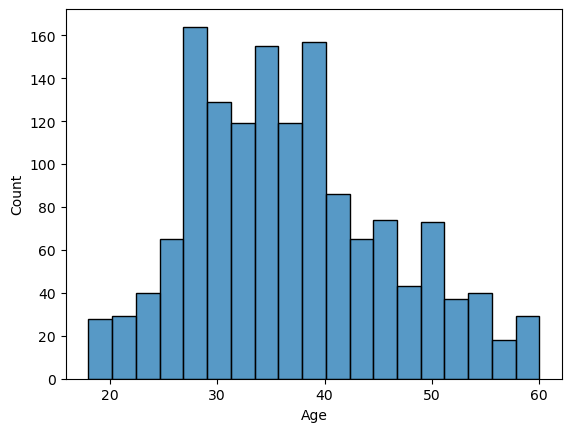

In [22]:
sns.histplot(df['Age'])
print(df['Age'].min())
print(df['Age'].max())

#### the minimum employee age is 18 and the maximum employee is 60

#### the most of the employee are the afge between 25 to 40

No     1233
Yes     237
Name: Attrition, dtype: int64

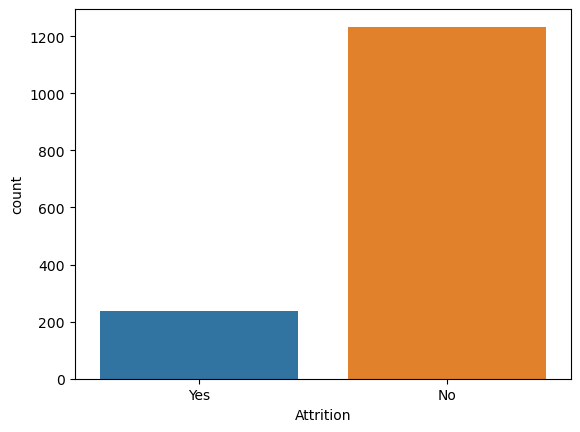

In [23]:
sns.countplot(df['Attrition'])
df['Attrition'].value_counts()

#### Here the Attriction is the target variable

#### the no of employee no attriction is 1237

#### the no of employee attriction is 237

#### so  we can see that the data is imblanced so we can deal this later

In [24]:
df['BusinessTravel'].nunique()

3

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

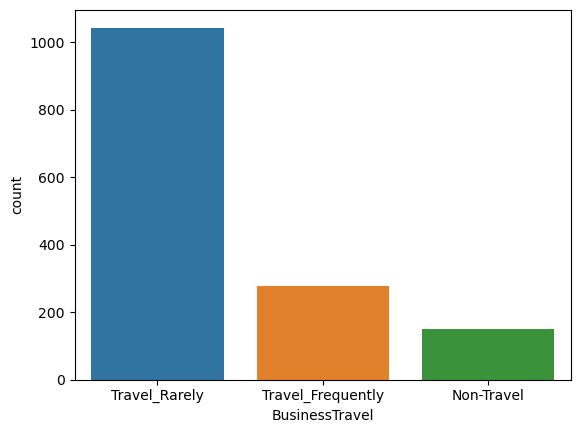

In [25]:
sns.countplot(df['BusinessTravel'])
df['BusinessTravel'].value_counts()

### 1047 employee are travel rarely

### 277 employee are travel frequently

### 150 emoloyee are not_travel

102
1499


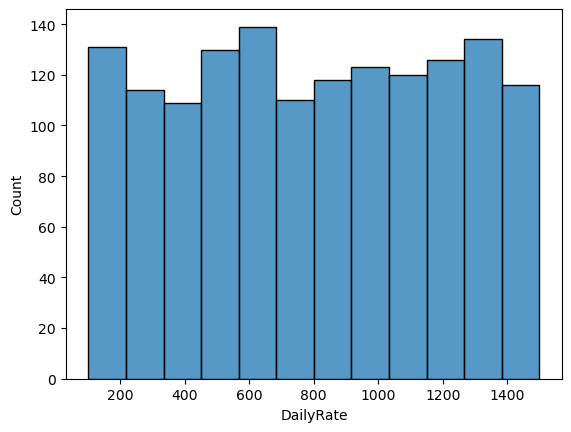

In [29]:
sns.histplot(df['DailyRate'])
print(df['DailyRate'].min())
print(df['DailyRate'].max())

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

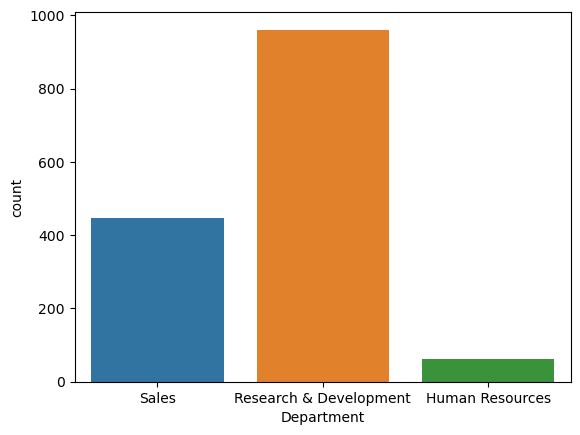

In [6]:

sns.countplot(df['Department'])
df['Department'].value_counts()

#### in employee dataset the Research and Development Department employee is most i.e-961

#### The sales Departrment employee are 446

#### The HumanResources employee are least i.e_63

In [7]:
df['DistanceFromHome'].nunique()

29

1
29


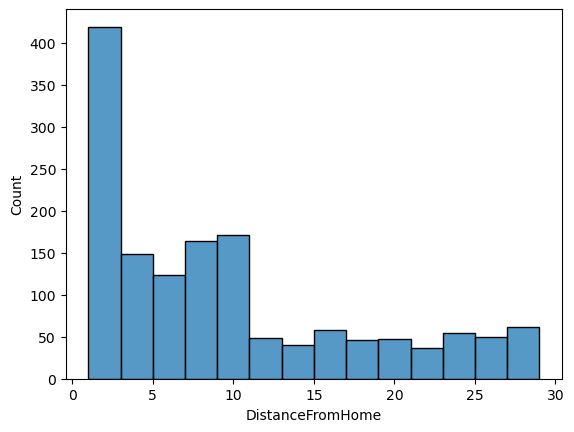

In [10]:
sns.histplot(df['DistanceFromHome'])
print(df['DistanceFromHome'].min())
print(df['DistanceFromHome'].max())

#### The minimum employee distance from Home is 1

### The maxium employee distance from Home is 29

#### The most of the employee distance from Home to office are in the range of 1-5 km .

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

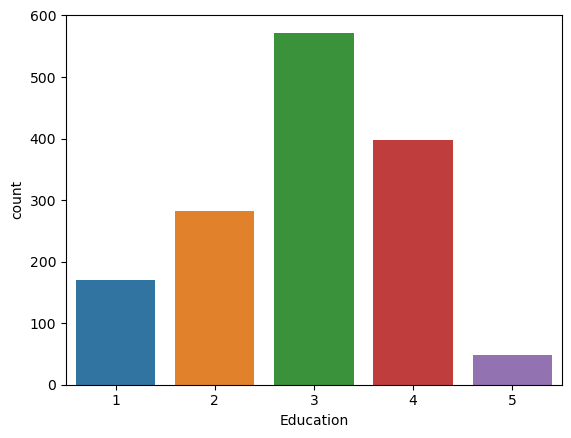

In [12]:
sns.countplot(df['Education'])
df['Education'].value_counts()

### The most of the employee are educational level3

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

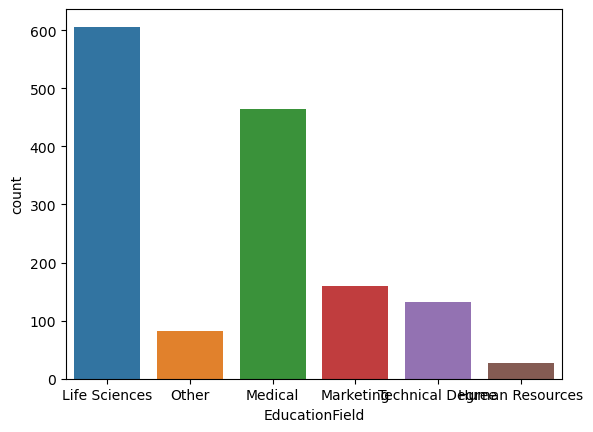

In [14]:
sns.countplot(df['EducationField'])
df['EducationField'].value_counts()

### The most of the employee education field are LifeScience and Then Medical beground

In [16]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

#### All the employee count value is same ie.1

1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: EmployeeNumber, Length: 1470, dtype: int64

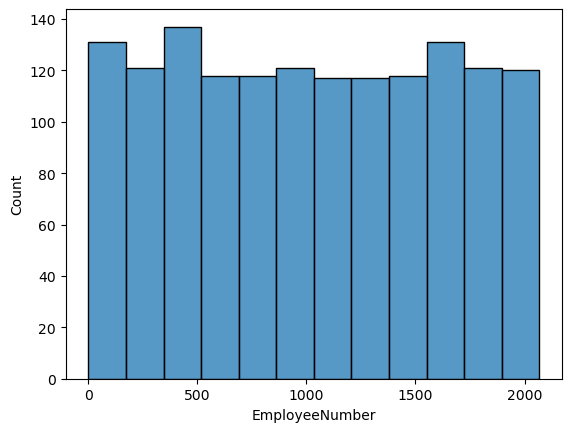

In [5]:
sns.histplot(df['EmployeeNumber'])
df['EmployeeNumber'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

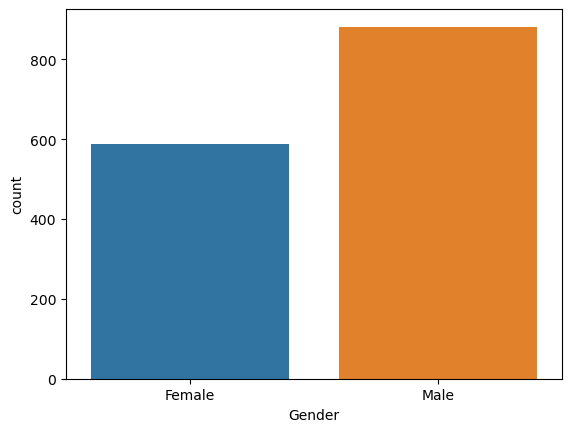

In [6]:
sns.countplot(df['Gender'])
df['Gender'].value_counts()

### The male employee are more i.e-882
### The female employee are 558

66    29
98    28
42    28
48    28
84    28
      ..
31    15
53    14
68    14
38    13
34    12
Name: HourlyRate, Length: 71, dtype: int64

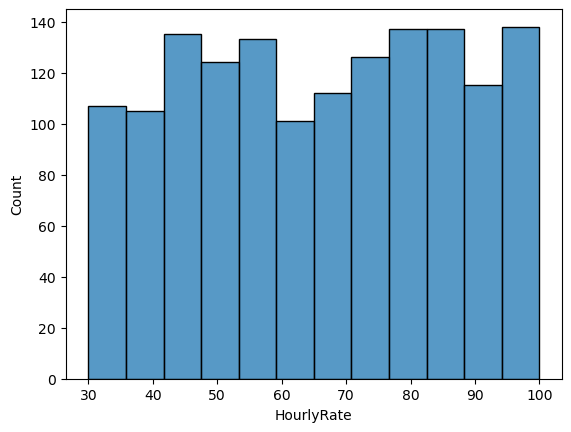

In [7]:
sns.histplot(df['HourlyRate'])
df['HourlyRate'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

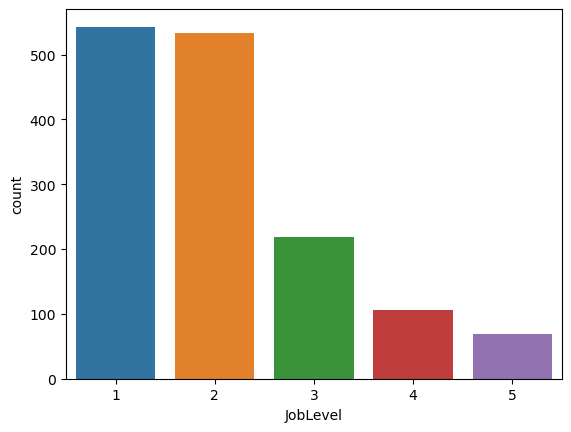

In [10]:
sns.countplot(df['JobLevel'])
df['JobLevel'].value_counts()

### The most of the Employee ie-543 employee are jobLevel 1



Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

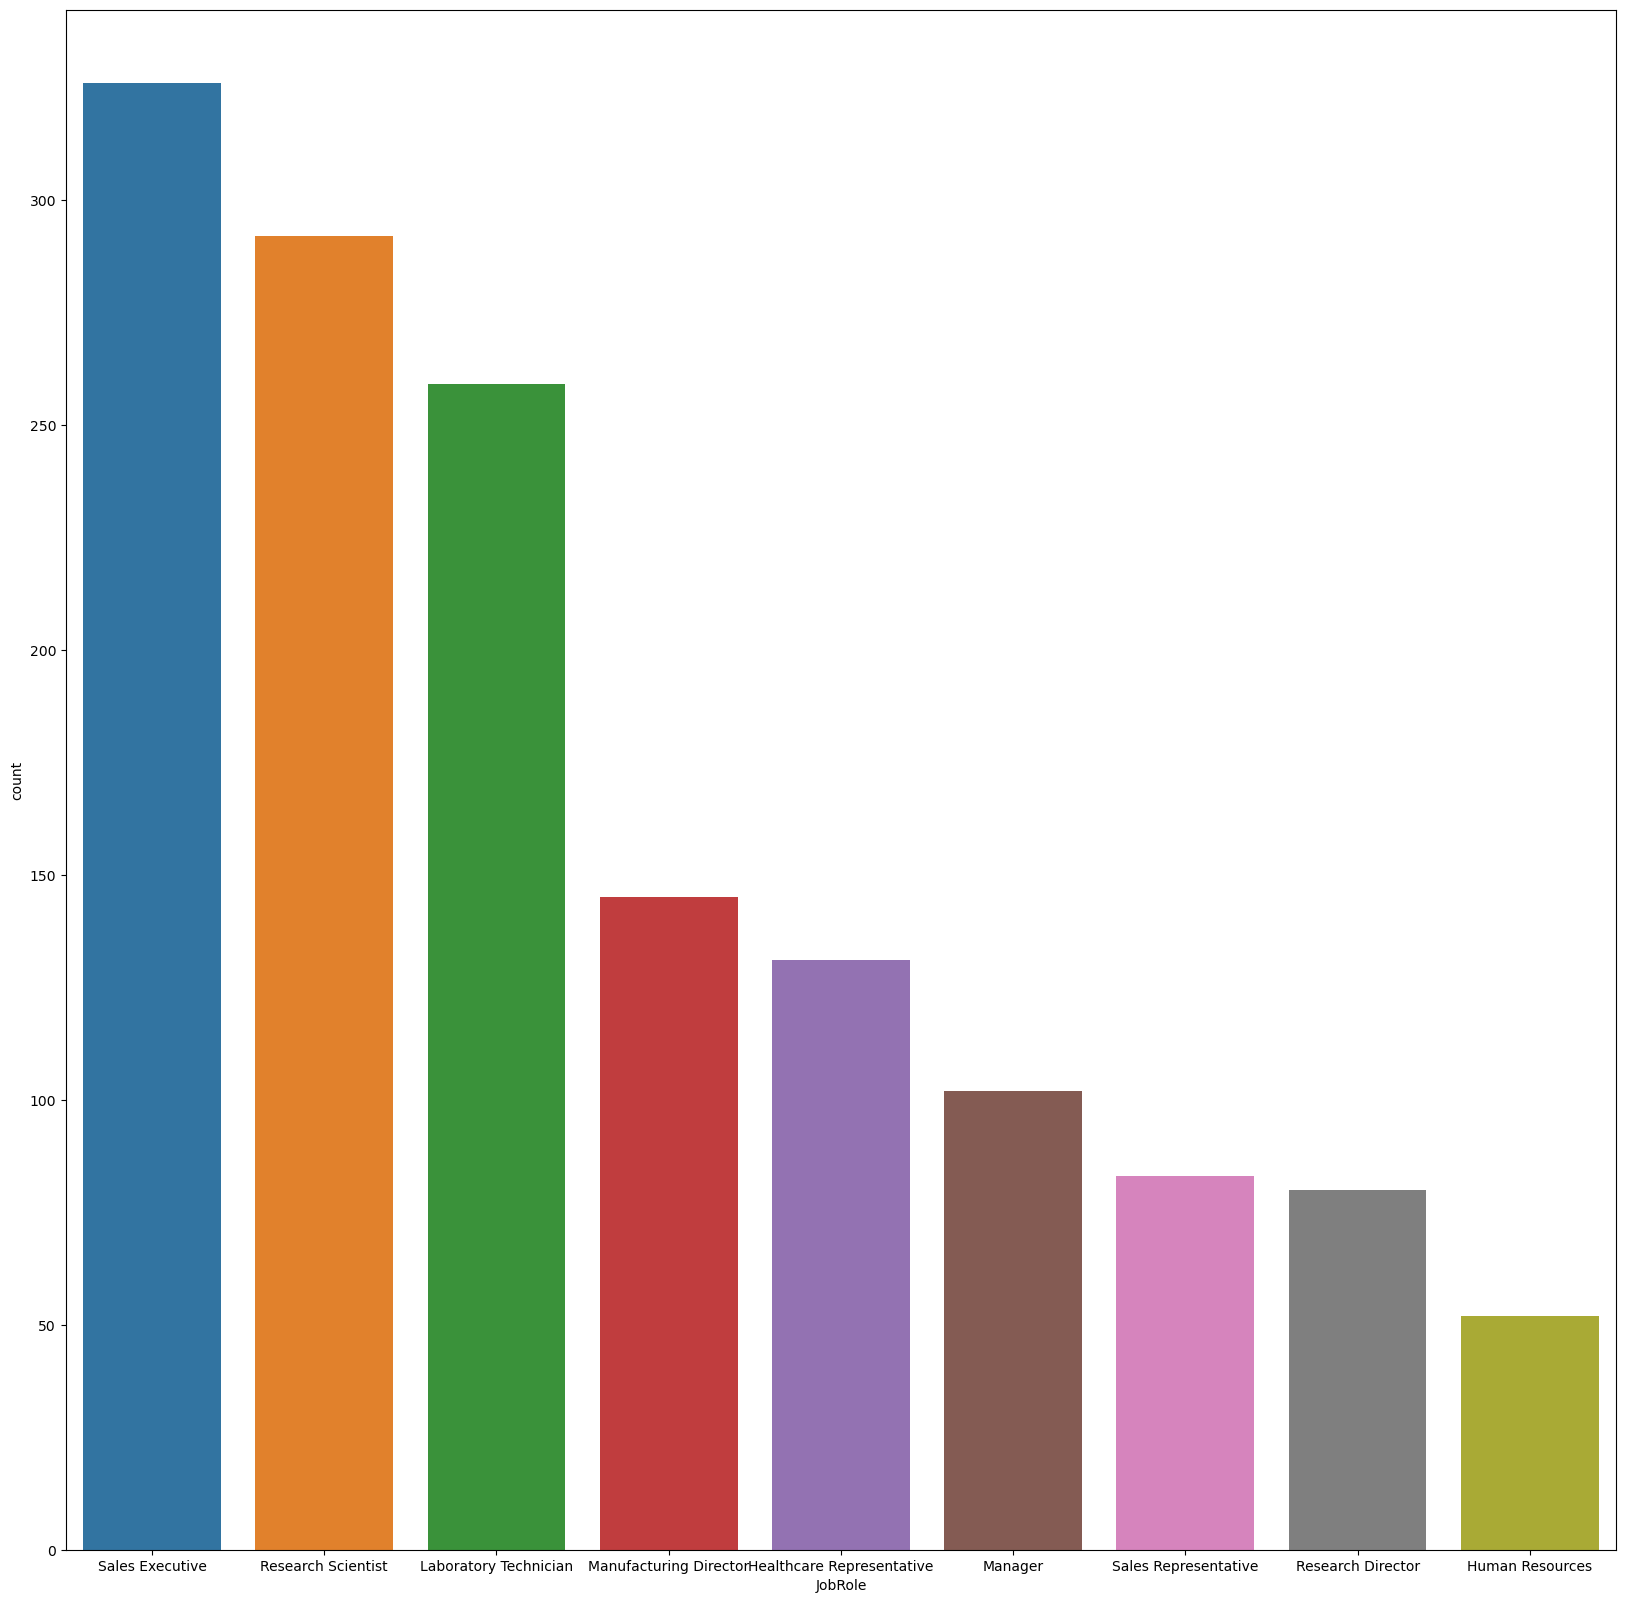

In [12]:
plt.figure(figsize=(20,20))
sns.countplot(df['JobRole'])

df['JobRole'].value_counts()

### The most of the Employee Jobrole is SalesExecutive

### 326 employee JobRole is SaleExecutive

### The least of the employee jobRole is HumanResources i.e-43 employee

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

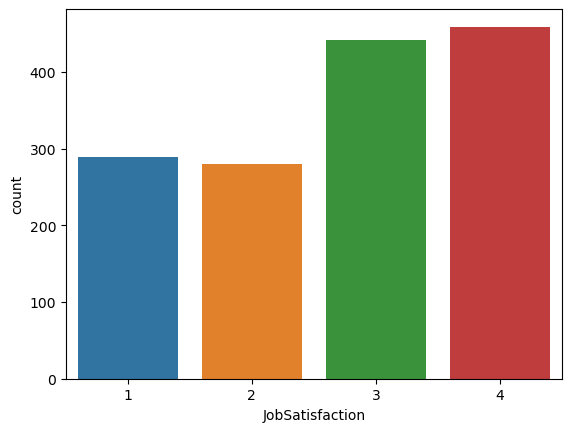

In [15]:
sns.countplot(df['JobSatisfaction'])
df['JobSatisfaction'].value_counts()

### The most of the employee are jobsatisfaction 3 and 4

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

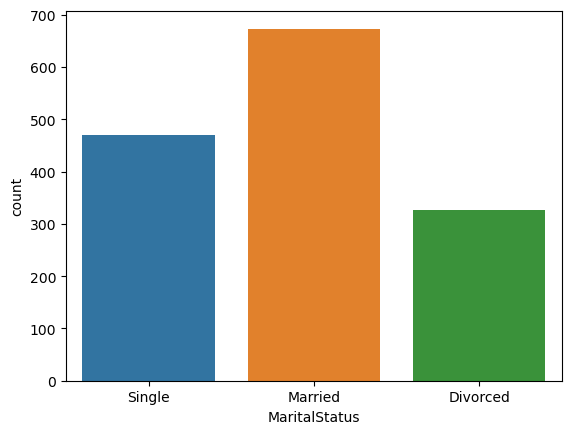

In [17]:
sns.countplot(df['MaritalStatus'])
df['MaritalStatus'].value_counts()

### The most of the employee are married i.e_673 employee

### The 470 employee are single

### The 327 employee are Divorced

2342     4
6142     3
2741     3
2559     3
2610     3
        ..
7104     1
2773     1
19513    1
3447     1
4404     1
Name: MonthlyIncome, Length: 1349, dtype: int64

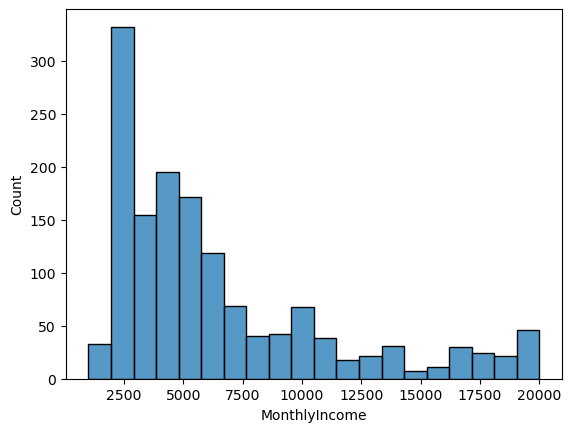

In [18]:
sns.histplot(df['MonthlyIncome'])
df['MonthlyIncome'].value_counts()

### The most of the employee Montlyincome is between 2000 to 3000

4223     3
9150     3
9558     2
12858    2
22074    2
        ..
14561    1
2671     1
5718     1
11757    1
10228    1
Name: MonthlyRate, Length: 1427, dtype: int64

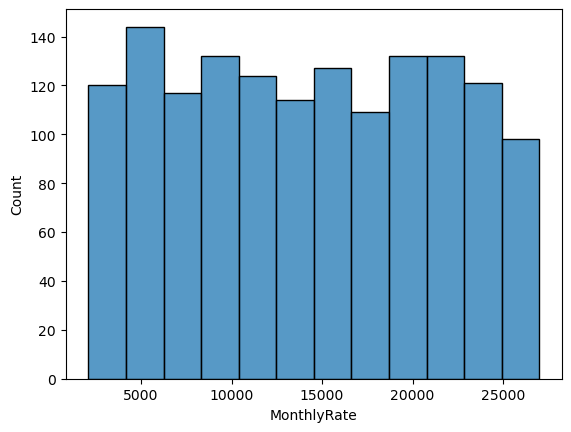

In [19]:
sns.histplot(df['MonthlyRate'])
df['MonthlyRate'].value_counts()

### The most of the employee montlyrate are betwneen 4000 to 6000

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

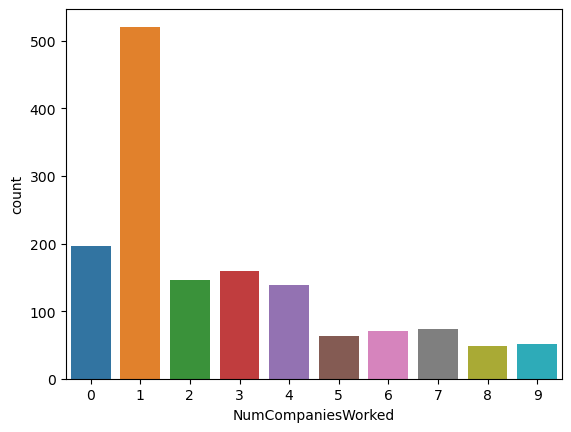

In [20]:
sns.countplot(df['NumCompaniesWorked'])
df['NumCompaniesWorked'].value_counts()

### The most of the employee are worked at 1 companies i.e-521 employee

### The 52 employee are worked at 9 companies

### The 49 employee are worked at 8 companies

In [21]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

### We can see that all the empoyee age are above 18

No     1054
Yes     416
Name: OverTime, dtype: int64

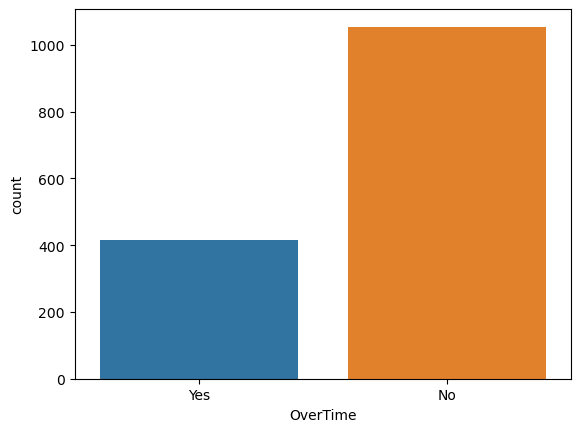

In [22]:
sns.countplot(df['OverTime'])
df['OverTime'].value_counts()

### The most of the employee i.e-1054 employee are not doing overtime

### only 416 employee are doing overtime

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

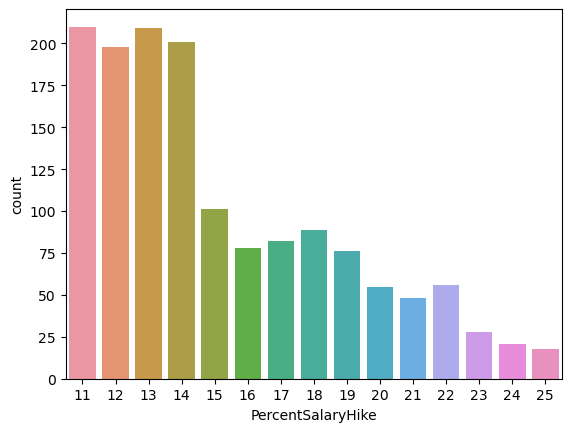

In [23]:
sns.countplot(df['PercentSalaryHike'])
df['PercentSalaryHike'].value_counts()

### We can see that 210 employee are 11% salary hike

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

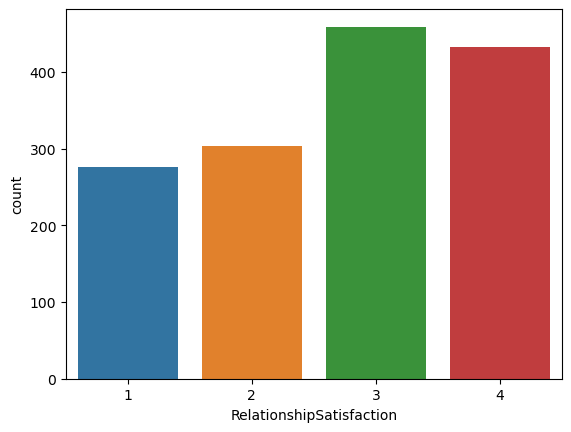

In [24]:
sns.countplot(df['RelationshipSatisfaction'])
df['RelationshipSatisfaction'].value_counts()

### The most of the employee i.e-459 employee are relationshipsastifction level3

In [28]:
sns.histplot(df['TotalWorkingYears  '])
df['TotalWorkingYears'].value_counts()

KeyError: 'TotalWorkingYears  '

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64

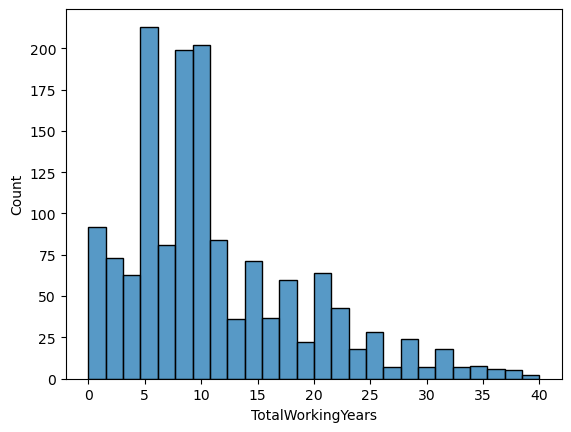

In [30]:
sns.histplot(df['TotalWorkingYears'])
df['TotalWorkingYears'].value_counts()

### The most of the employee are working hours between 4 to 12

### Bivarient Analysis

In [34]:
df.columns.to_list()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

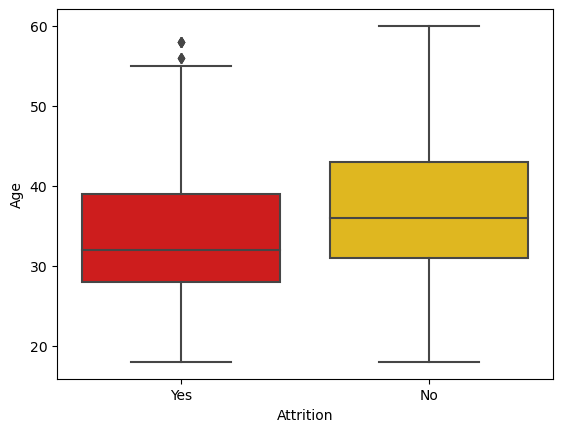

In [37]:

sns.boxplot(x='Attrition',y='Age',data=df,palette='hot')
plt.show()

#### We found that median age of employee's in the company is 30 - 40 Yrs. Minimum age is 18 Yrs.
#### and Maximum age is 60 Yrs.

####  From the Age Comparison boxplot, majority of people who left the company are below 40 Yrs.
#### and among the people who didn't left the company are of age 32 to 40 years.

#### Age has an effect on attrition. So it is considered as influential variable for attrition.

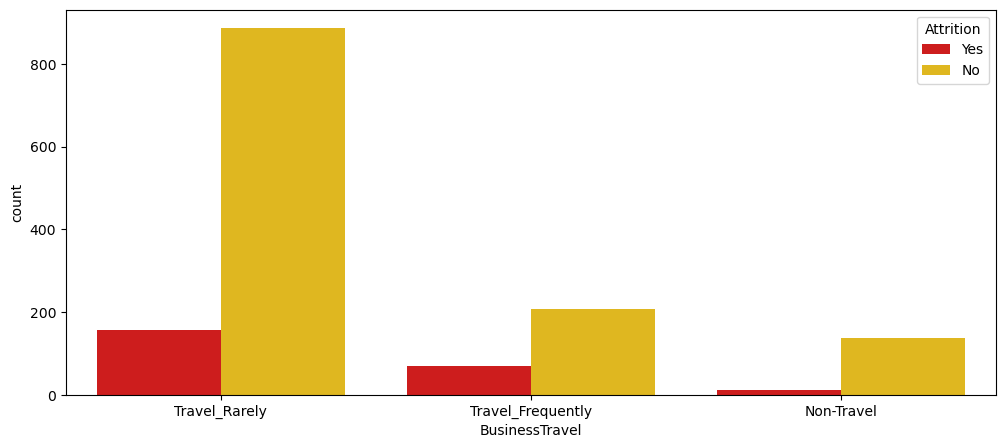

In [39]:
plt.figure(figsize=(12,5))
sns.countplot(x='BusinessTravel',hue='Attrition',data=df,palette='hot')
plt.show()

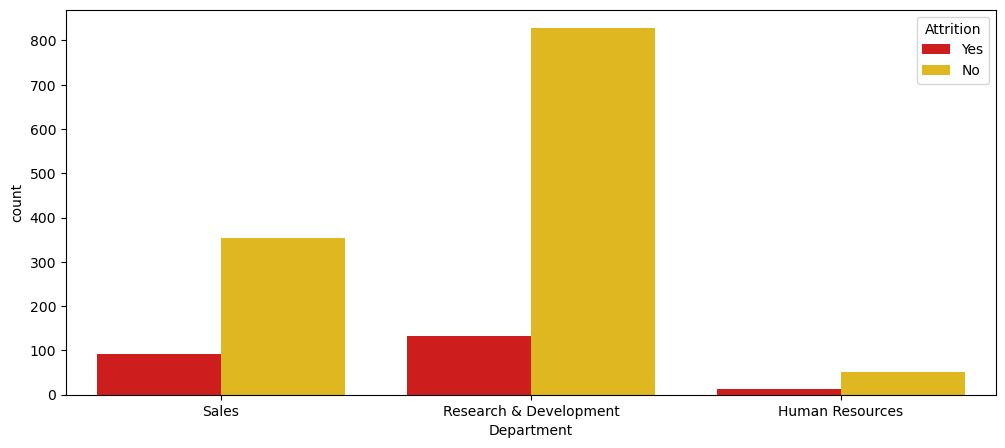

In [40]:
plt.figure(figsize=(12,5))
sns.countplot(x='Department',hue='Attrition',data=df,palette='hot')
plt.show()

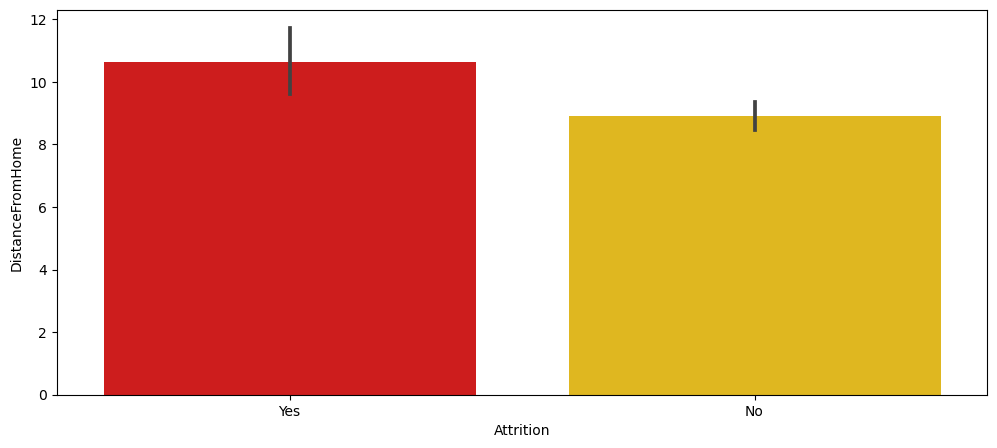

In [44]:
plt.figure(figsize=(12,5))
sns.barplot(x='Attrition',y='DistanceFromHome',data=df,palette='hot')
plt.show()

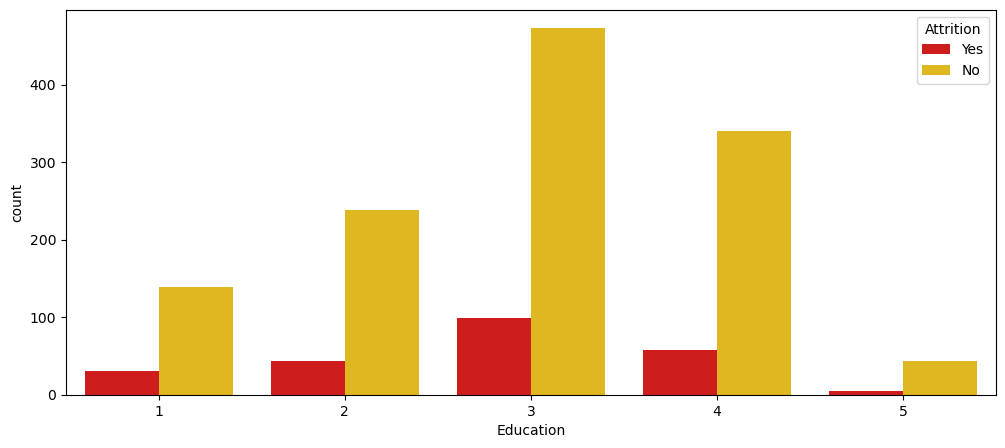

In [45]:
plt.figure(figsize=(12,5))
sns.countplot(x='Education',hue='Attrition',data=df,palette='hot')
plt.show()

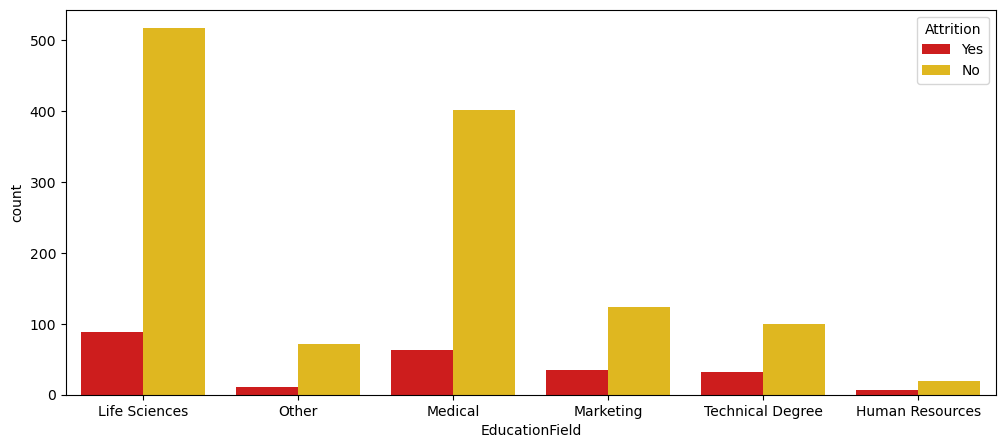

In [46]:
plt.figure(figsize=(12,5))
sns.countplot(x='EducationField',hue='Attrition',data=df,palette='hot')
plt.show()

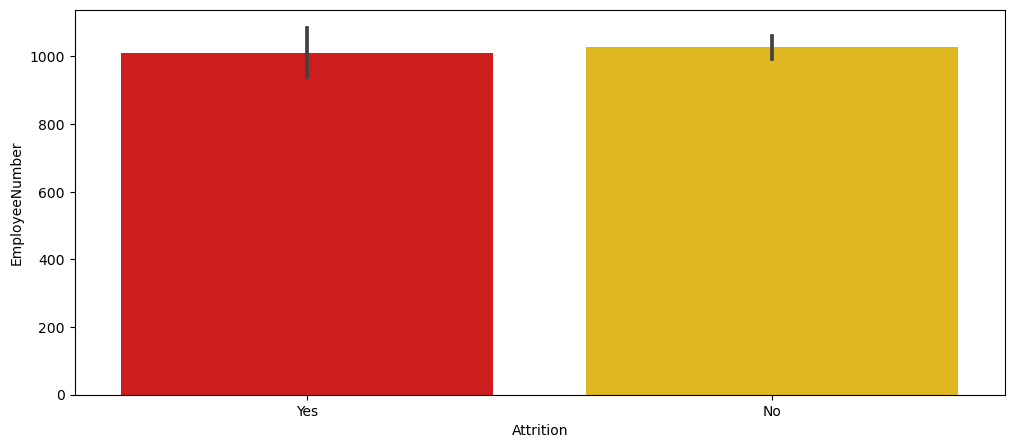

In [51]:
plt.figure(figsize=(12,5))
sns.barplot(x='Attrition',y='EmployeeNumber',data=df,palette='hot')
plt.show()

In [13]:
df.groupby(["Gender","Attrition"]).agg({"count":"sum"})

KeyError: "Column(s) ['count'] do not exist"

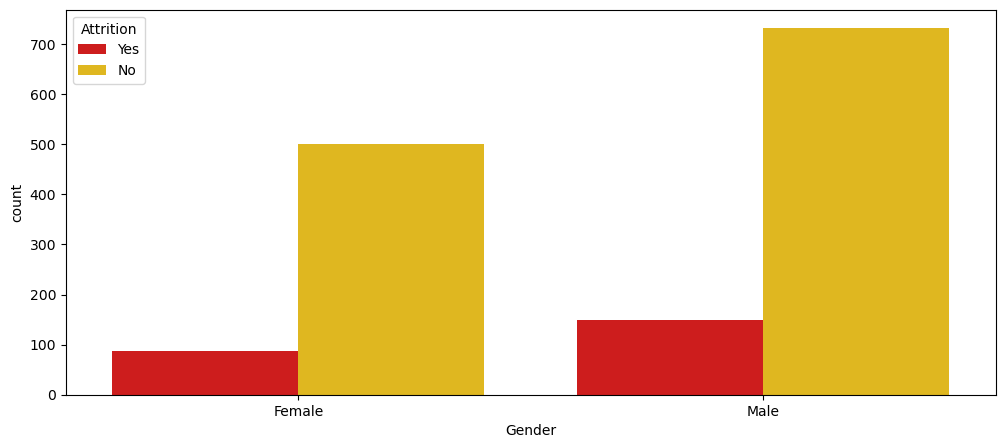

In [52]:
plt.figure(figsize=(12,5))
sns.countplot(x='Gender',hue='Attrition',data=df,palette='hot')
plt.show()


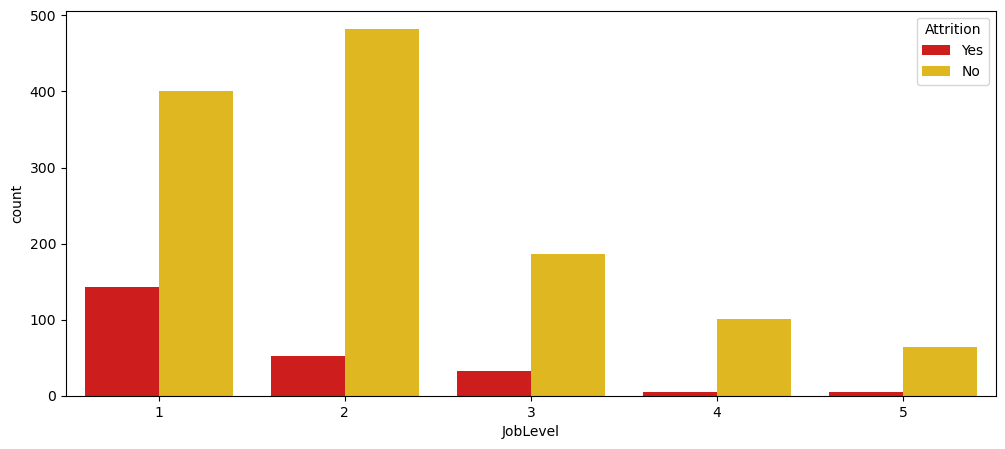

In [53]:
plt.figure(figsize=(12,5))
sns.countplot(x='JobLevel',hue='Attrition',data=df,palette='hot')
plt.show()

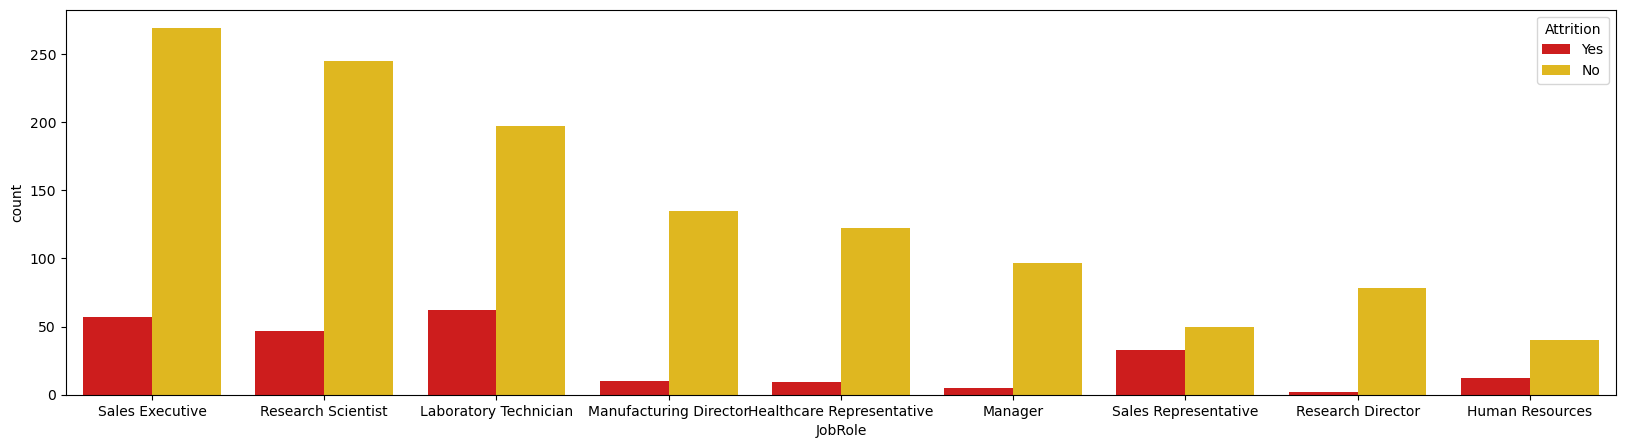

In [58]:
plt.figure(figsize=(20,5))
sns.countplot(x='JobRole',hue='Attrition',data=df,palette='hot')
plt.show()

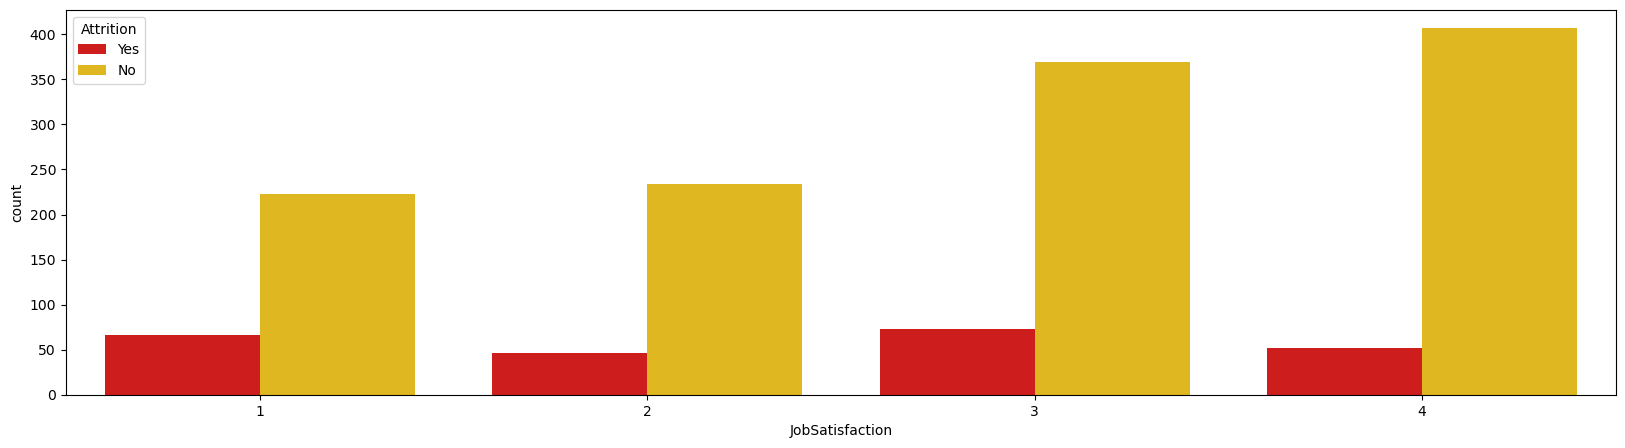

In [59]:
plt.figure(figsize=(20,5))
sns.countplot(x='JobSatisfaction',hue='Attrition',data=df,palette='hot')
plt.show()

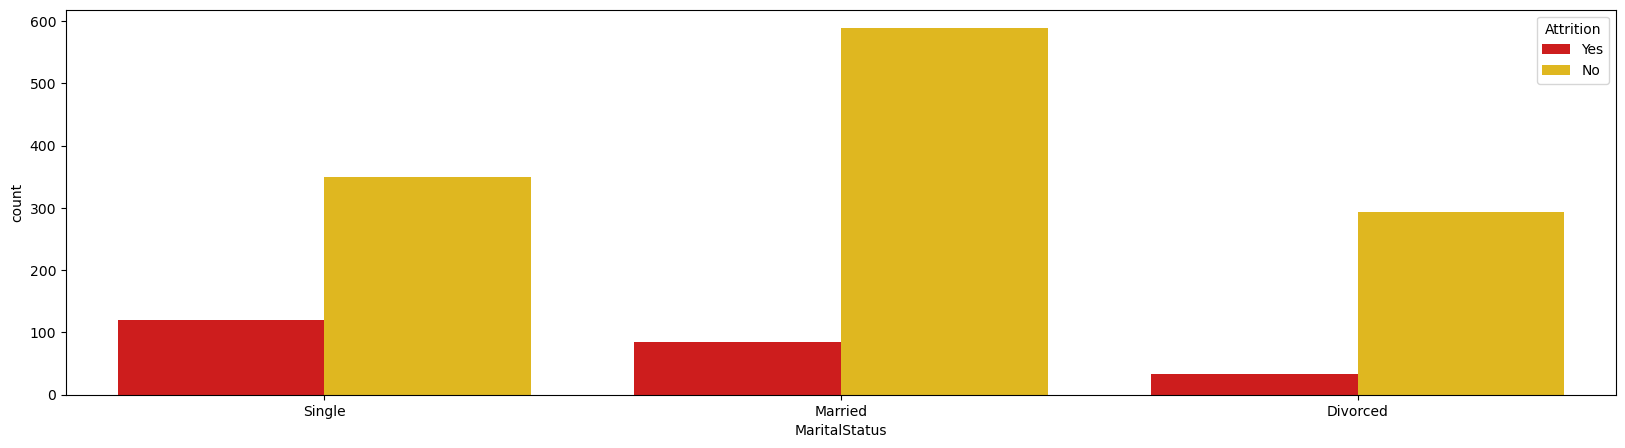

In [60]:
plt.figure(figsize=(20,5))
sns.countplot(x='MaritalStatus',hue='Attrition',data=df,palette='hot')
plt.show()

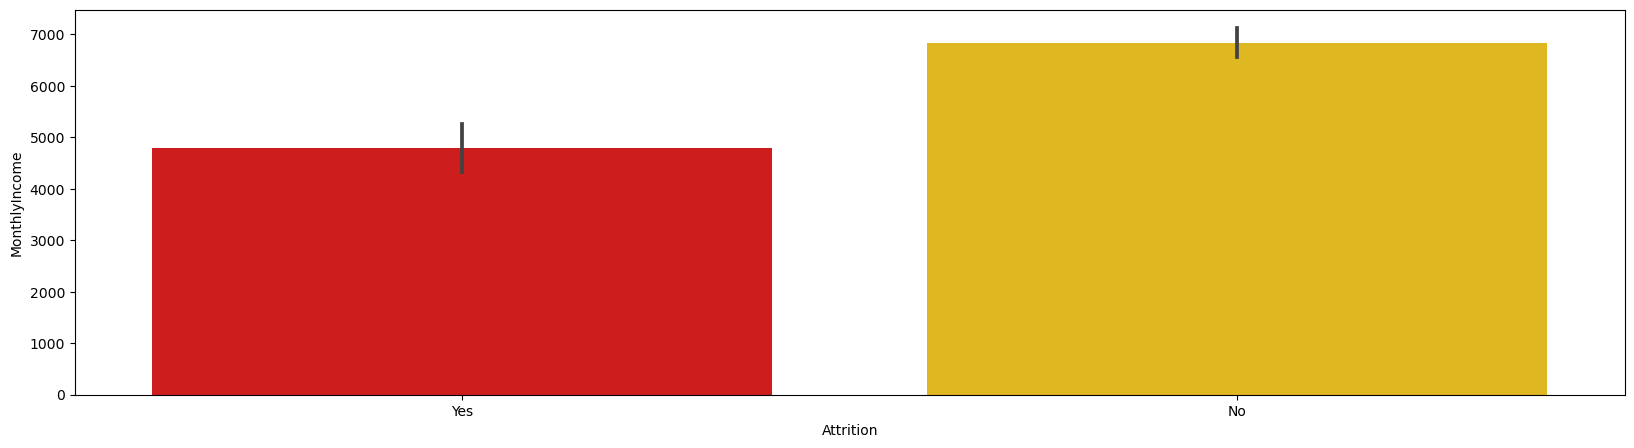

In [61]:
plt.figure(figsize=(20,5))
sns.barplot(x='Attrition',y='MonthlyIncome',data=df,palette='hot')
plt.show()

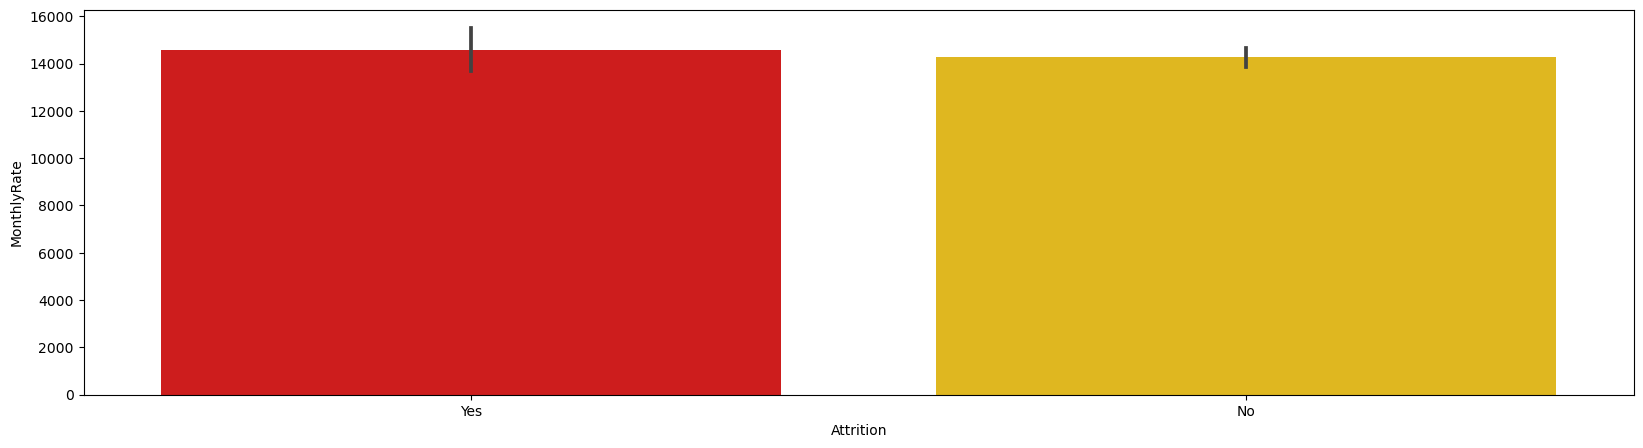

In [62]:
plt.figure(figsize=(20,5))
sns.barplot(x='Attrition',y='MonthlyRate',data=df,palette='hot')
plt.show()

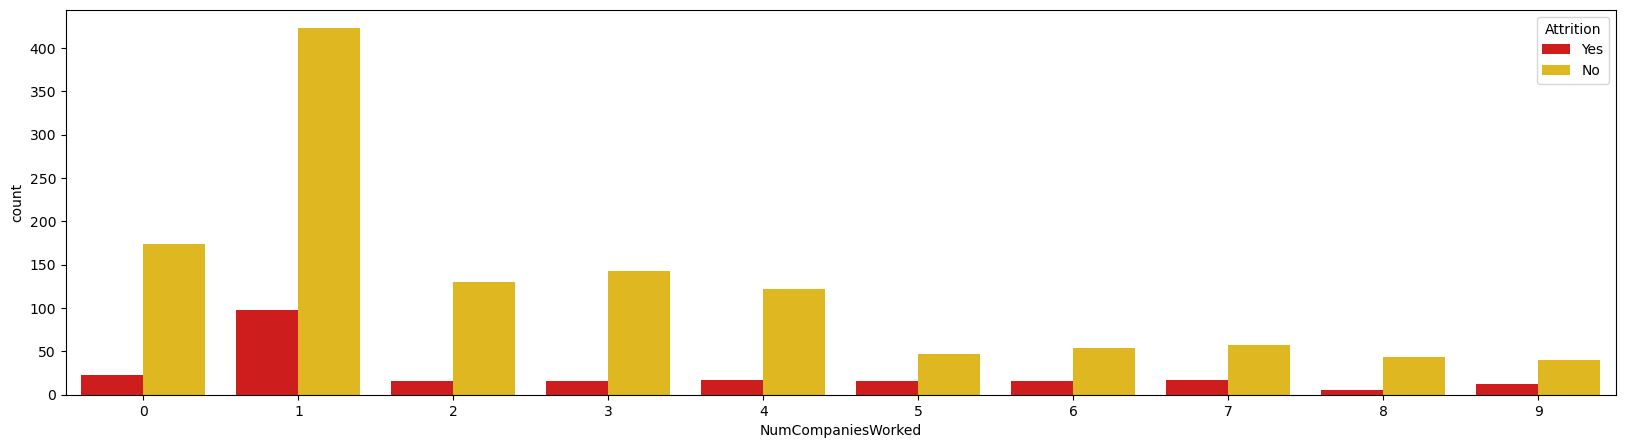

In [64]:
plt.figure(figsize=(20,5))
sns.countplot(x='NumCompaniesWorked',hue='Attrition',data=df,palette='hot')
plt.show()

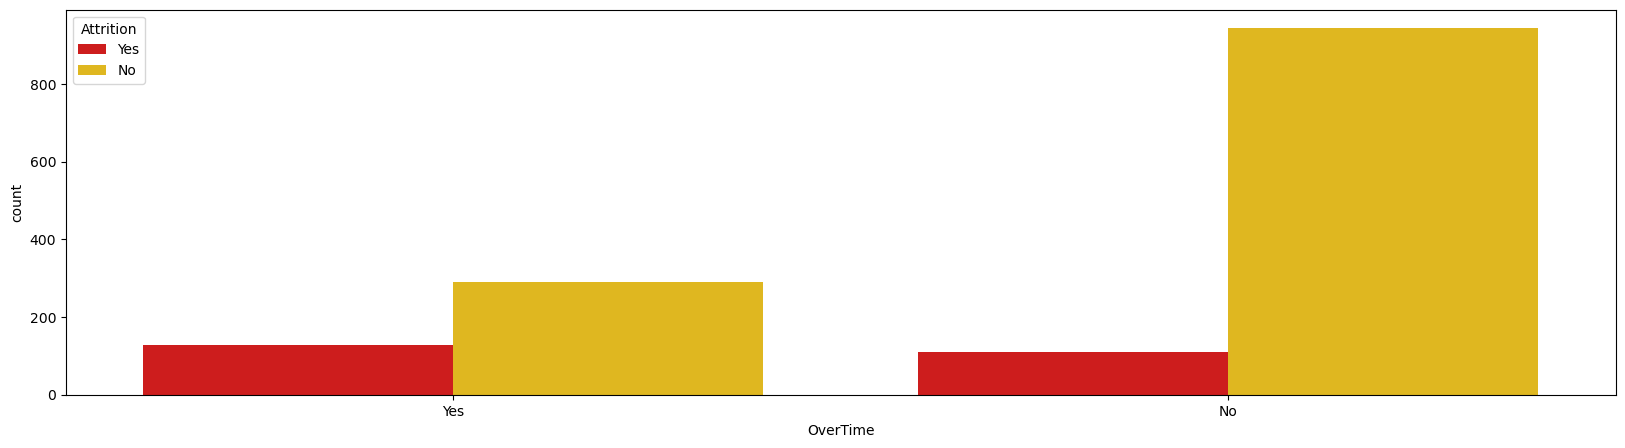

In [65]:
plt.figure(figsize=(20,5))
sns.countplot(x='OverTime',hue='Attrition',data=df,palette='hot')
plt.show()

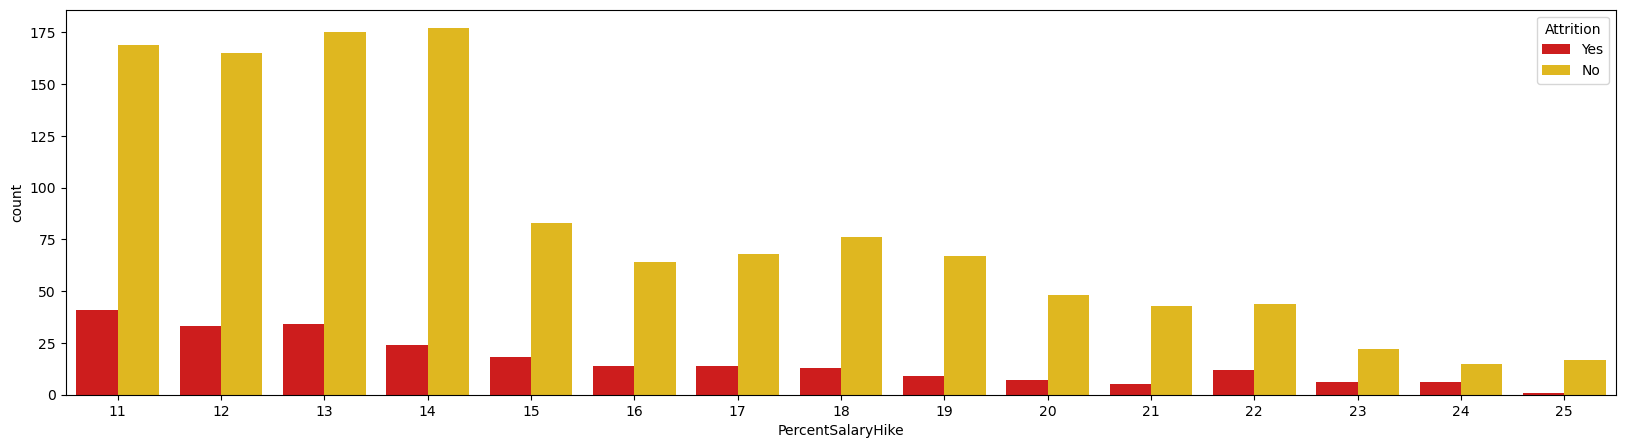

In [66]:
plt.figure(figsize=(20,5))
sns.countplot(x='PercentSalaryHike',hue='Attrition',data=df,palette='hot')
plt.show()

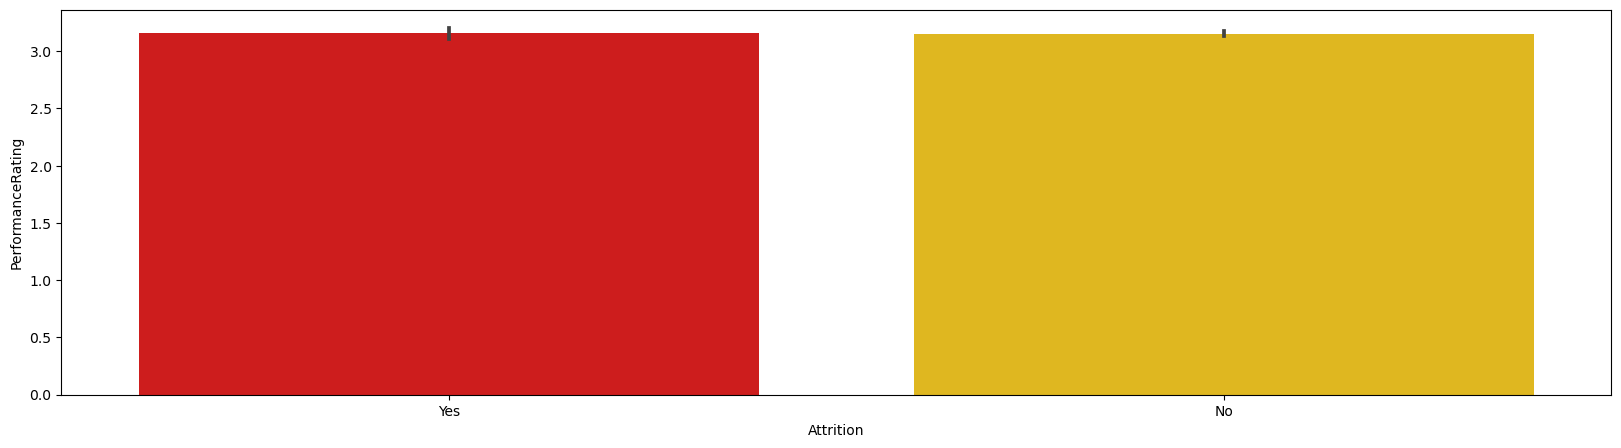

In [69]:
plt.figure(figsize=(20,5))
sns.barplot(x='Attrition',y='PerformanceRating',data=df,palette='hot')
plt.show()

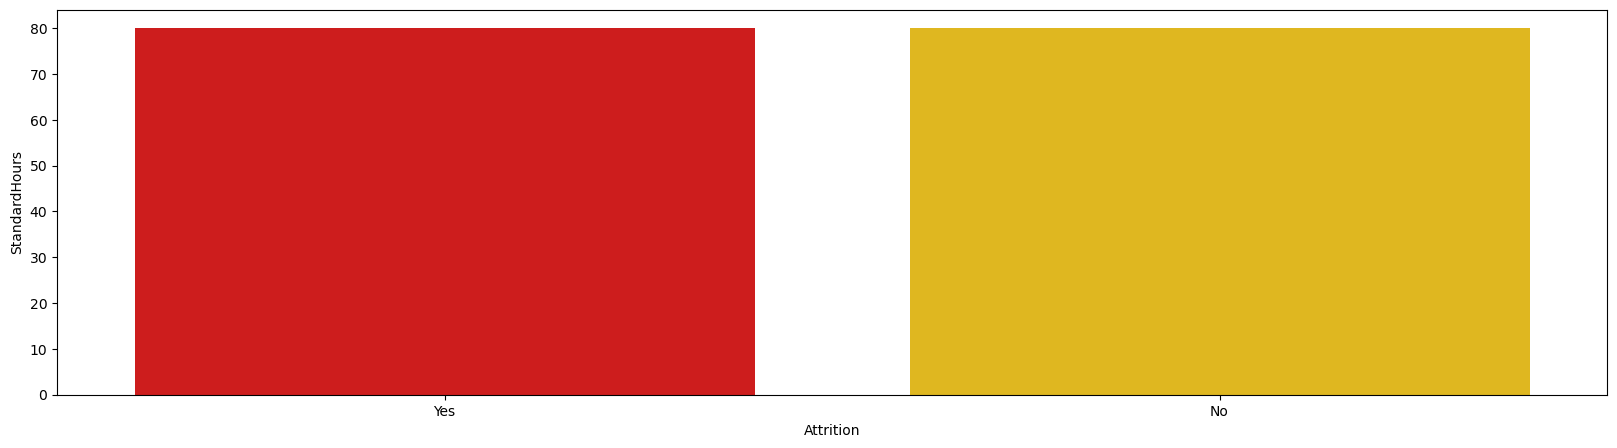

In [70]:
plt.figure(figsize=(20,5))
sns.barplot(x='Attrition',y='StandardHours',data=df,palette='hot')
plt.show()

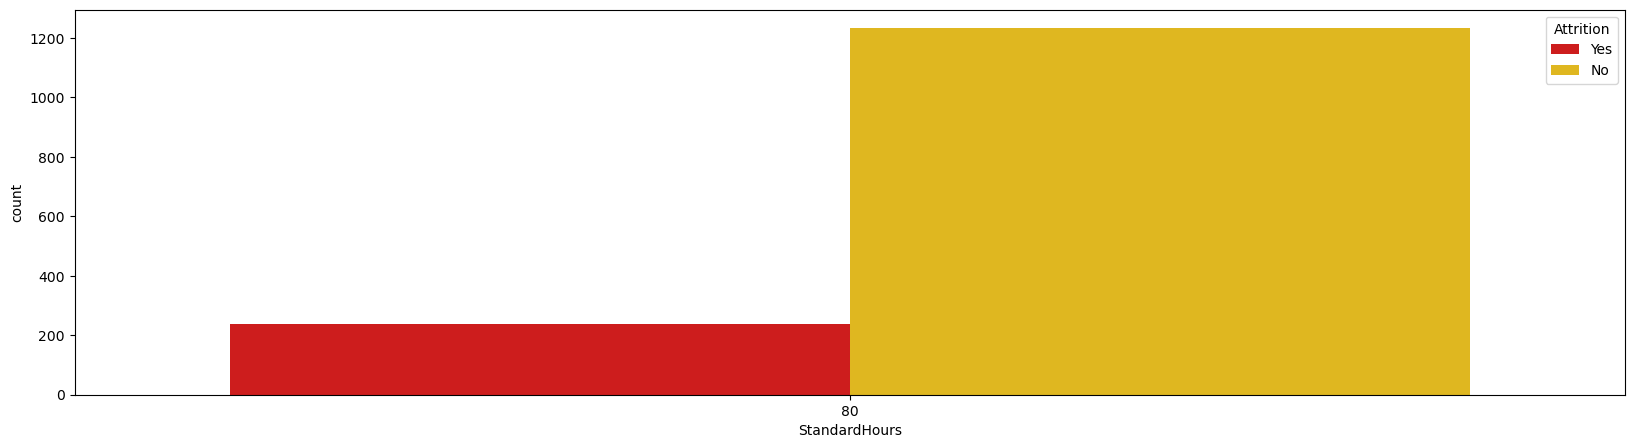

In [71]:
plt.figure(figsize=(20,5))
sns.countplot(x='StandardHours',hue='Attrition',data=df,palette='hot')
plt.show()

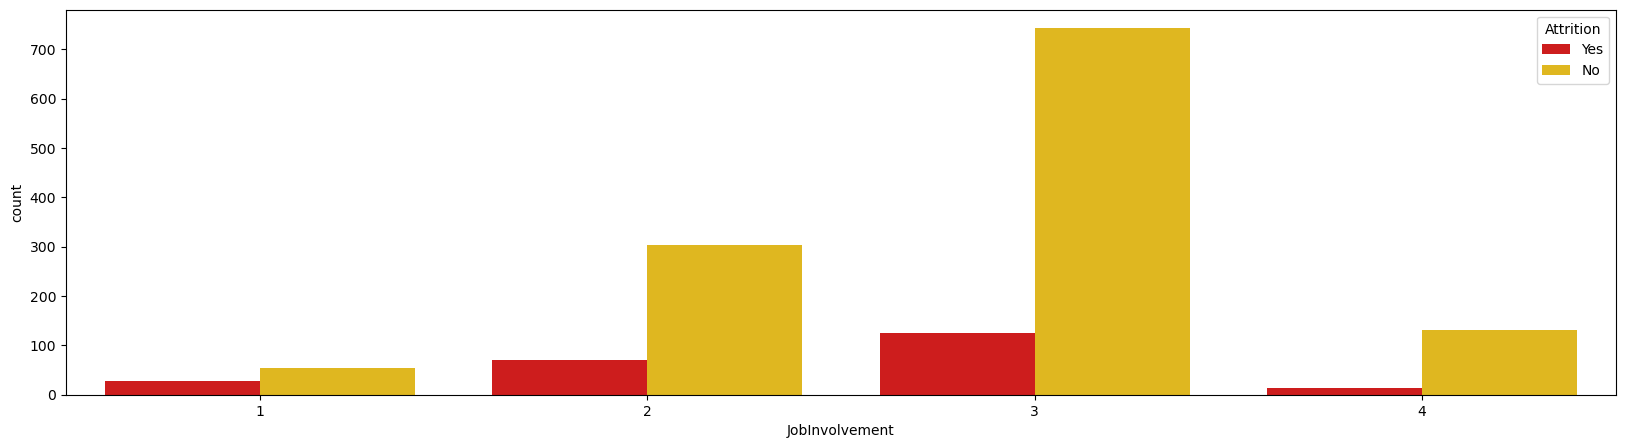

In [72]:
plt.figure(figsize=(20,5))
sns.countplot(x='JobInvolvement',hue='Attrition',data=df,palette='hot')
plt.show()

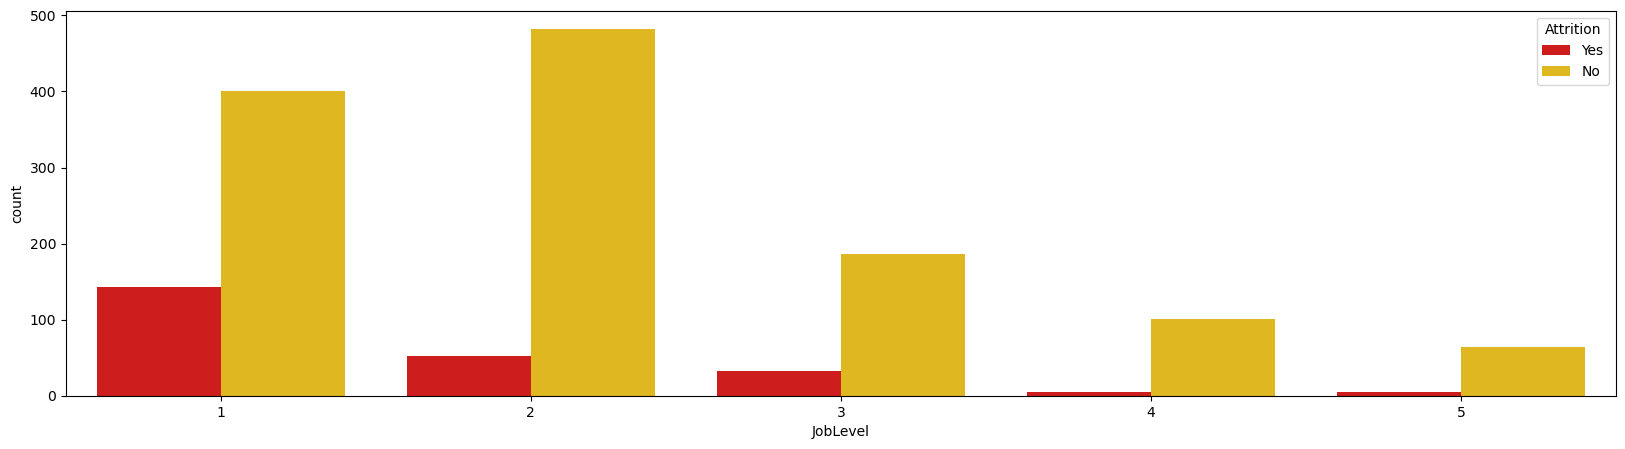

In [18]:
plt.figure(figsize=(20,5))
sns.countplot(x='JobLevel',hue='Attrition',data=df,palette='hot')
plt.show()

In [19]:
df.TotalWorkingYears.value_counts()

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64

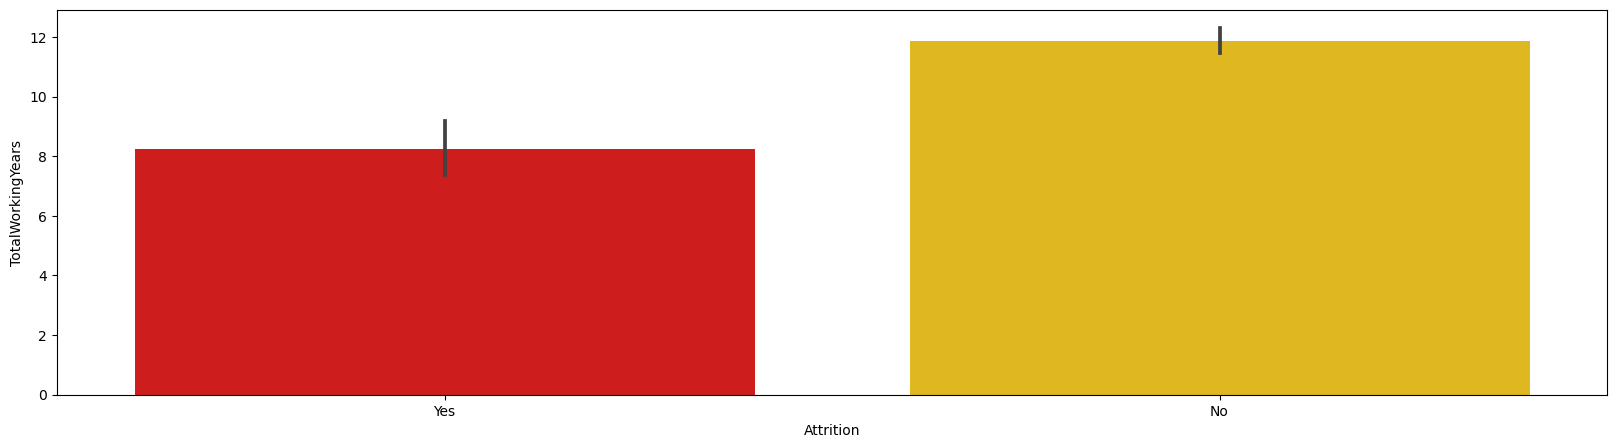

In [20]:
plt.figure(figsize=(20,5))
sns.barplot(x='Attrition',y='TotalWorkingYears',data=df,palette='hot')
plt.show()

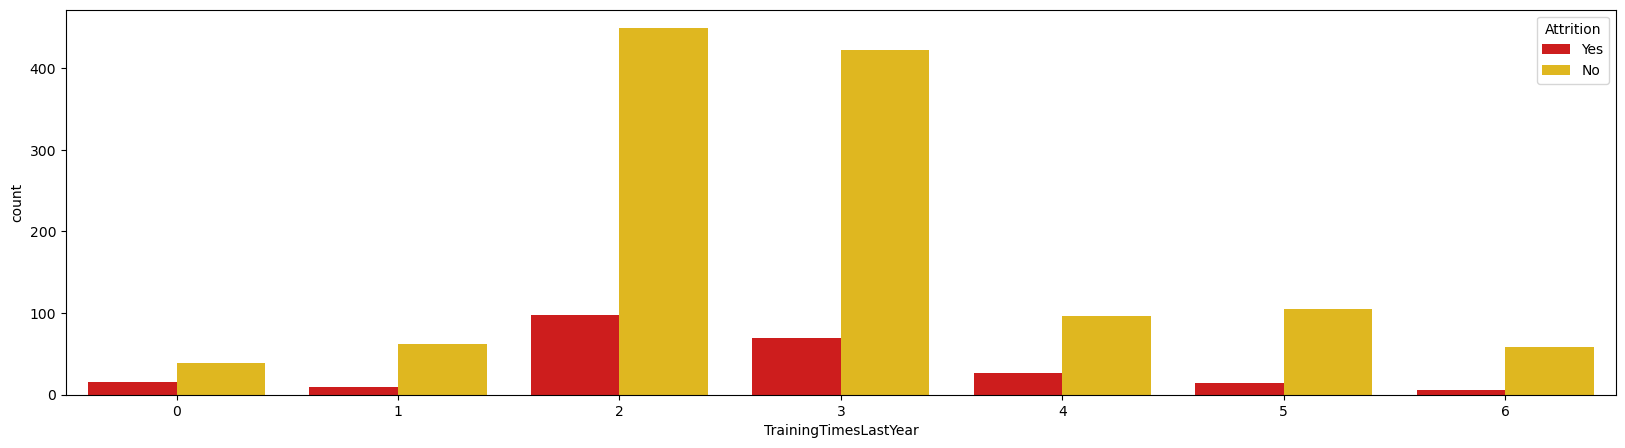

In [24]:
plt.figure(figsize=(20,5))
sns.countplot(x='TrainingTimesLastYear',hue='Attrition',data=df,palette='hot')
plt.show()

In [23]:
df.TrainingTimesLastYear.value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

In [26]:
df.dtypes=="object"

Age                         False
Attrition                    True
BusinessTravel               True
DailyRate                   False
Department                   True
DistanceFromHome            False
Education                   False
EducationField               True
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                       True
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                      True
JobSatisfaction             False
MaritalStatus                True
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                       True
OverTime                     True
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [29]:
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [71]:
df["Attrition"]=df["Attrition"].map({'No':0,'Yes':1})

In [72]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1})

In [73]:
pd.set_option('display.max_columns',None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [74]:
df.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [75]:
df['Over18']=df['Over18'].map({'N':0,'Y':1})

In [76]:
df['OverTime']=df['OverTime'].map({'No':0,'Yes':1})

In [77]:
df['BusinessTravel']=df['BusinessTravel'].map({'Non-Travel':0,'Travel_Frequently':2,'Travel_Rarely':1})

In [78]:
df['MaritalStatus']=df['MaritalStatus'].map({'Divorced':0,'Single':1,'Married':2})

In [79]:
from sklearn.preprocessing import LabelEncoder
encoding_cols=['Department','EducationField','JobRole']
label_encoders={}
for column in encoding_cols:
    label_encoders[column]=LabelEncoder()
    df[column]=label_encoders[column].fit_transform(df[column])

### Lets see if there is any outliers present in the data

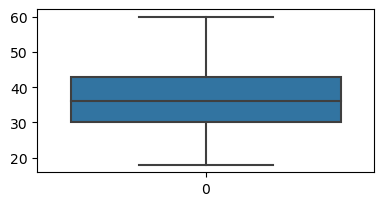

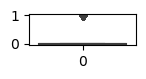

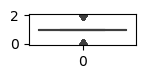

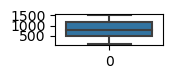

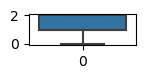

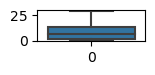

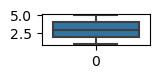

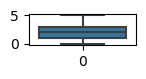

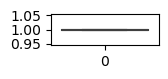

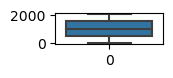

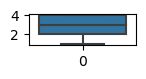

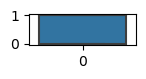

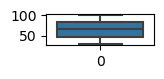

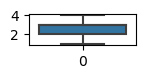

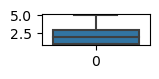

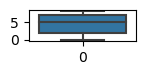

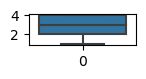

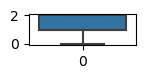

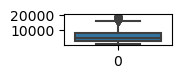

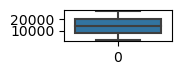

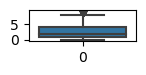

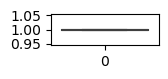

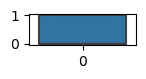

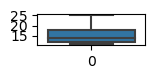

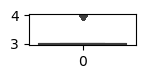

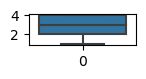

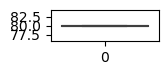

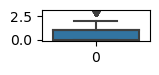

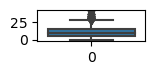

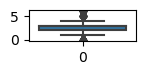

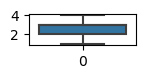

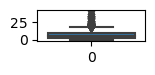

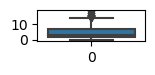

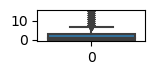

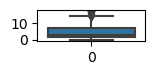

In [80]:
plt.figure(figsize=(20,25))
graph=1

for column in df:
    if graph<=40:
        plt.subplot(10,4,graph)
        ax=sns.boxplot(data=df[column])
        
        
        graph+=1
        plt.show()

### We can see that there is some outliers present in the data so lets remove this

In [81]:
from scipy.stats import zscore
out_features=df[['BusinessTravel','MonthlyIncome','NumCompaniesWorked','PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
z=np.abs(zscore(out_features))
z

,BusinessTravel,MonthlyIncome,NumCompaniesWorked,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.162399,0.108350,2.125136,0.426230,0.932014,0.421642,2.171982,0.164613,0.063296,0.679146,0.245834
1,1.717339,0.291719,0.678049,2.346151,0.241988,0.164511,0.155707,0.488508,0.764998,0.368715,0.806541
2,0.162399,0.937654,1.324226,0.426230,0.932014,0.550208,0.155707,1.144294,1.167687,0.679146,1.155935
3,1.717339,0.763634,0.678049,0.426230,0.932014,0.421642,0.155707,0.161947,0.764998,0.252146,1.155935
4,0.162399,0.644858,2.525591,0.426230,0.241988,0.678774,0.155707,0.817734,0.615492,0.058285,0.595227
...,...,...,...,...,...,...,...,...,...,...,...
1465,1.717339,0.835451,0.523316,0.426230,0.241988,0.735447,0.155707,0.327893,0.615492,0.679146,0.314873
1466,0.162399,0.741140,0.523316,0.426230,0.241988,0.293077,1.707500,0.001333,0.764998,0.368715,0.806541
1467,0.162399,0.076690,0.678049,2.346151,0.241988,0.678774,2.171982,0.164613,0.615492,0.679146,0.314873
1468,1.717339,0.236474,0.277594,0.426230,0.932014,0.735447,0.155707,0.325228,0.488900,0.679146,1.086895


In [82]:
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([10,  9,  7,  9,  8,  9,  5,  5,  7,  9,  8,  9, 10,  5,  7,  9, 10,
         9,  5, 10,  7,  8,  9,  8, 10,  7,  9,  5,  7,  8,  9,  9, 10,  5,
         7,  7,  9,  9,  5,  8,  7,  7,  9,  7, 10,  9,  7,  5,  7,  9, 10,
         5

In [83]:
df1=df[(z<3).all(axis=1)]
df1.shape

(1387, 35)

In [84]:
#shape of old and new DataFrame
print("old Data Frame-",df.shape[0])
print("New Data Frame-",df1.shape[0])

old Data Frame- 1470
New Data Frame- 1387


In [85]:
print("data loss percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage- 5.646258503401361


In [86]:
df=df1

### check how the data is distributed in each column

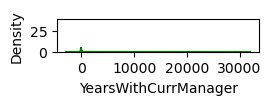

In [87]:
plt.figure(figsize=(12,5))
plotnumber=1

for column in df:
    if graph<=40:
        plt.subplot(10,4,plotnumber)
        ax=sns.distplot(df[column],color='g')
        
        

In [88]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel              0.077788
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EmployeeCount               0.000000
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.450413
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
Over18                      0.000000
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StandardHours               0.000000
S

In [89]:
df['YearsWithCurrManager']=np.cbrt(df['YearsWithCurrManager'])
df['YearsSinceLastPromotion']=np.cbrt(df['YearsSinceLastPromotion'])
df['YearsInCurrentRole']=np.cbrt(df['YearsInCurrentRole'])
df['YearsAtCompany']=np.cbrt(df['YearsAtCompany'])
df['TotalWorkingYears']=np.cbrt(df['TotalWorkingYears'])
df['StockOptionLevel']=np.cbrt(df['StockOptionLevel'])
df['PerformanceRating']=np.cbrt(df['PerformanceRating'])
df['PercentSalaryHike']=np.cbrt(df['PercentSalaryHike'])
df['OverTime']=np.cbrt(df['OverTime'])
df['NumCompaniesWorked']=np.cbrt(df['NumCompaniesWorked'])
df['MonthlyIncome']=np.cbrt(df['MonthlyIncome'])
df['JobLevel']=np.cbrt(df['JobLevel'])



In [90]:
df['DistanceFromHome']=np.cbrt(df['DistanceFromHome'])

In [91]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel              0.077788
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.183373
Education                  -0.289024
EducationField              0.544868
EmployeeCount               0.000000
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.508238
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.450413
MonthlyIncome               0.742985
MonthlyRate                 0.030596
NumCompaniesWorked         -0.689329
Over18                      0.000000
OverTime                    0.954751
PercentSalaryHike           0.582921
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StandardHours               0.000000
S

In [92]:
cor=df.corr()
cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159366,-0.010538,0.021946,-0.038242,-0.025336,0.198502,-0.032676,NaN,-0.002704,0.014098,-0.039430,0.025465,0.036424,0.446088,-0.112957,0.011763,0.038880,0.447415,0.026954,0.295597,NaN,0.034180,0.008383,-0.000617,0.041744,NaN,0.086748,0.627064,-0.019008,-0.016913,0.177960,0.105743,0.101450,0.100669
Attrition,-0.159366,1.000000,0.127943,-0.057220,0.063637,0.082048,-0.032703,0.023585,NaN,-0.010169,-0.112393,0.036252,-0.001532,-0.133957,-0.187482,0.064283,-0.114206,-0.021732,-0.187076,0.014888,0.055629,NaN,0.257237,-0.009754,0.010781,-0.052344,NaN,-0.185386,-0.228715,-0.057285,-0.062492,-0.203407,-0.192863,-0.052245,-0.207332
BusinessTravel,-0.010538,0.127943,1.000000,-0.019992,-0.000820,-0.027468,-0.017873,-0.026075,NaN,-0.020710,-0.013667,-0.050311,-0.004172,0.026677,-0.019288,0.009137,0.007433,0.009043,-0.012116,-0.007563,-0.022515,NaN,0.041355,-0.022639,0.009973,0.020676,NaN,-0.021841,0.024086,0.015193,0.012382,0.009453,0.026857,0.019246,0.003125
DailyRate,0.021946,-0.057220,-0.019992,1.000000,-0.005398,-0.004974,-0.018442,0.040645,NaN,-0.044886,0.033123,-0.005242,0.014279,0.048004,0.018906,-0.015437,0.042698,0.004665,0.032615,-0.029844,0.035902,NaN,0.020294,0.028576,0.000574,0.004516,NaN,0.047603,0.044422,0.005861,-0.044266,0.009147,0.022090,-0.037737,0.020606
Department,-0.038242,0.063637,-0.000820,-0.005398,1.000000,0.035218,0.012846,0.013432,NaN,-0.007828,-0.014540,-0.030618,-0.002412,-0.024040,0.171287,0.678627,0.029521,0.016275,0.122324,0.022741,-0.027915,NaN,0.014908,-0.020465,-0.039364,-0.037705,NaN,-0.002079,-0.007723,0.036092,0.026978,0.013848,0.041710,0.017221,0.013575
DistanceFromHome,-0.025336,0.082048,-0.027468,-0.004974,0.035218,1.000000,0.002841,0.010756,NaN,0.034088,-0.013476,0.008278,0.017855,0.031665,0.014569,0.007373,-0.017223,0.003775,-0.009158,0.047013,0.000882,NaN,0.034994,0.036405,0.015406,0.009816,NaN,0.025771,-0.004807,-0.019576,-0.029395,0.009664,0.016791,-0.000831,-0.005555
Education,0.198502,-0.032703,-0.017873,-0.018442,0.012846,0.002841,1.000000,-0.038017,NaN,0.042707,-0.026223,-0.019166,0.010848,0.041343,0.096041,0.015140,-0.007219,-0.005845,0.095491,-0.018540,0.121756,NaN,-0.017166,-0.008641,-0.023487,-0.002393,NaN,0.025008,0.155944,-0.026879,0.007844,0.036109,0.046828,0.014855,0.021868
EducationField,-0.032676,0.023585,-0.026075,0.040645,0.013432,0.010756,-0.038017,1.000000,NaN,0.000058,0.047924,0.010676,-0.006539,-0.006876,-0.039172,0.017492,-0.050934,-0.004944,-0.032899,-0.023384,-0.018899,NaN,0.007912,-0.007318,-0.003621,-0.013734,NaN,-0.017829,-0.004469,0.050502,0.034038,0.001351,0.017493,0.021206,0.034246
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.002704,-0.010169,-0.020710,-0.044886,-0.007828,0.034088,0.042707,0.000058,NaN,1.000000,0.011003,0.016348,0.028040,-0.009965,-0.013070,-0.010483,-0.048405,0.051110,-0.012527,0.001158,0.006461,NaN,-0.033032,-0.019669,-0.027355,-0.063017,NaN,0.050435,0.000936,0.018555,0.006280,0.018413,0.011259,0.013499,0.007046


In [93]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

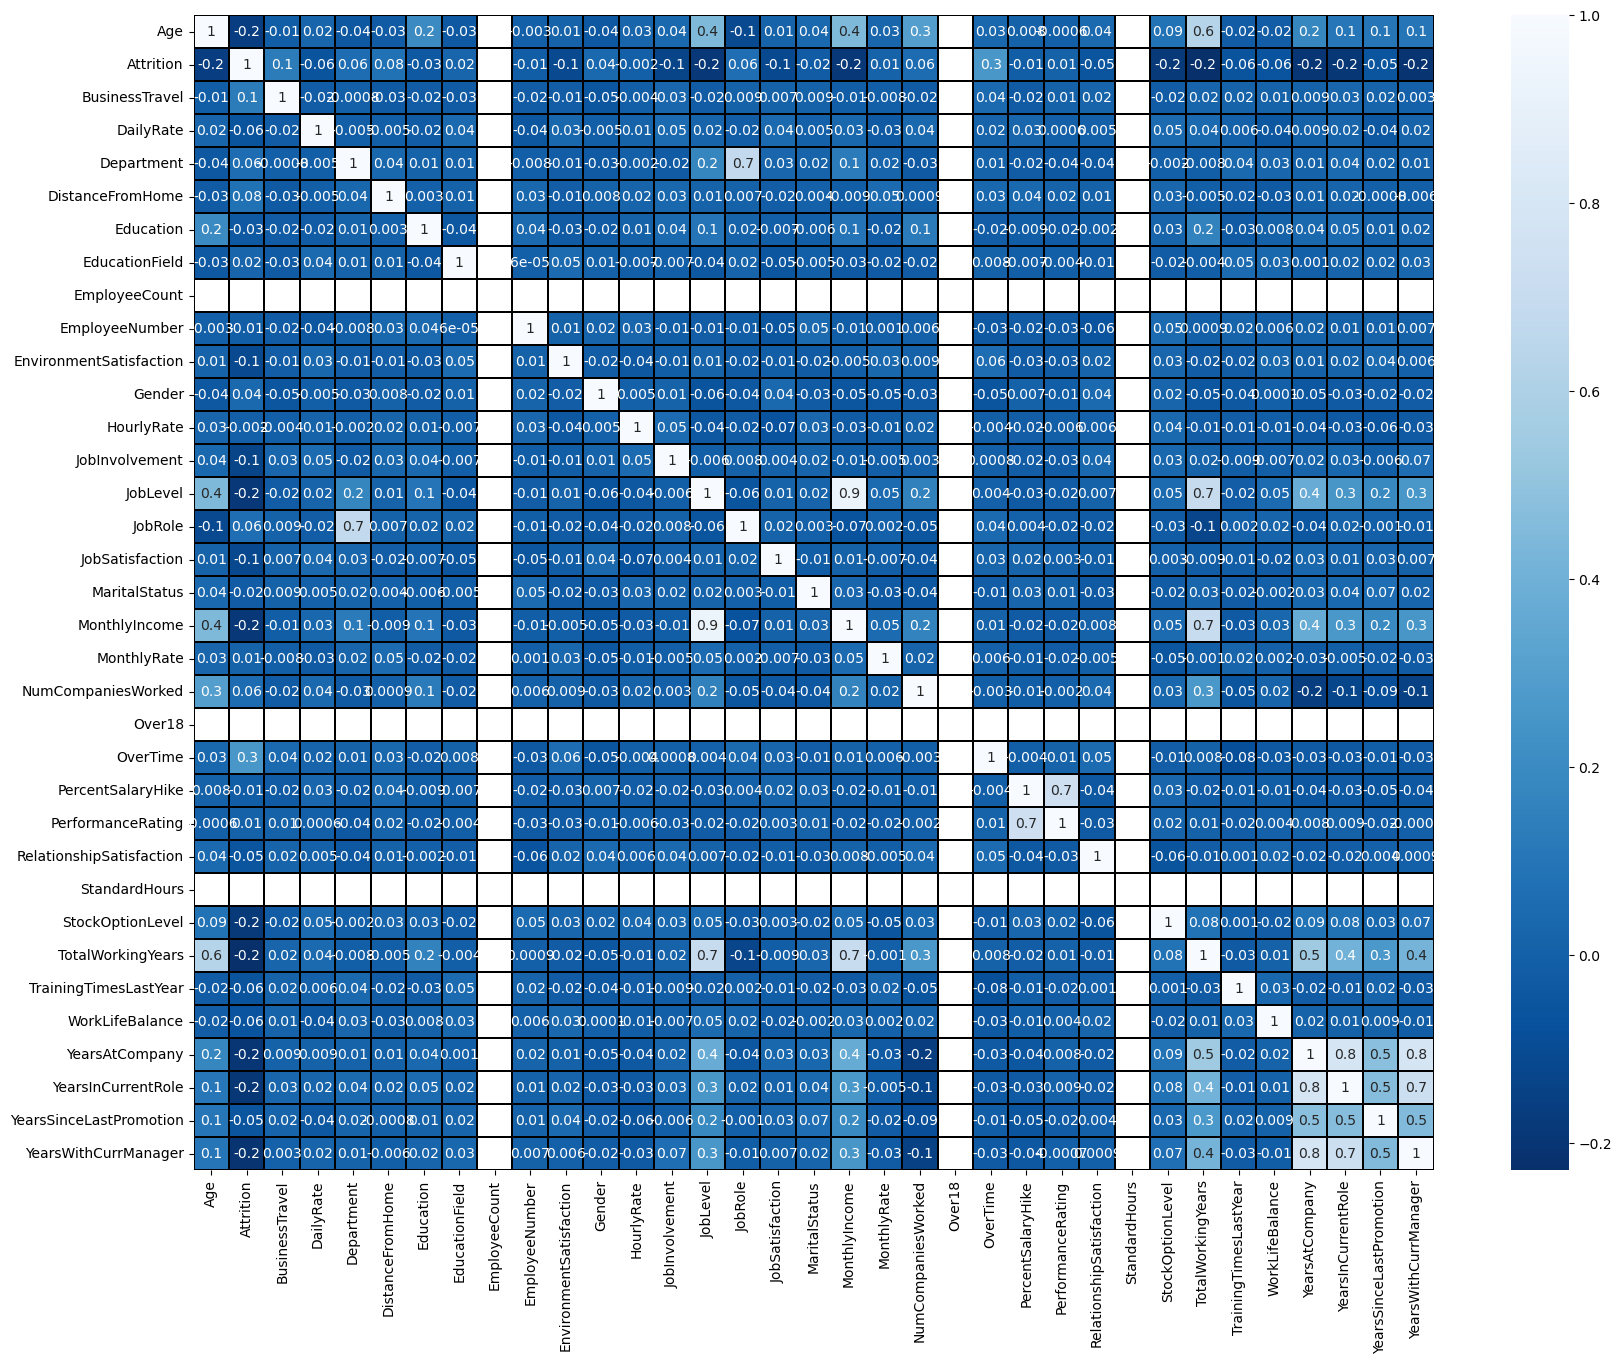

In [94]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")
plt.show()

### This heatmap show the corelation matrix by visualizing the data .we can observe the relation between feature to feature and feature to lable in the heat map
.
### This heatmap contains both positive and negative corelation.

### we can see that all the features are less corelated with label so there is no strong corelation between features and lable.

### we can see that the features MonthlyIncome and JobLevel are highly corelaterd with eachother.

### we can see that the features JobLevel and TotalWorkingYears,MonthlyIncome and TotalWorkingYears, and JobRole and Department features are strongly corelated with each other.

### we can see that the value for Over18,StandardHours and EmployeeCount are same for all of the column so there is nocorelation value for these 3 column

### From the above see can see that  if there isany  multicolinearity issue present in this dataset or not.


<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobLevel'>

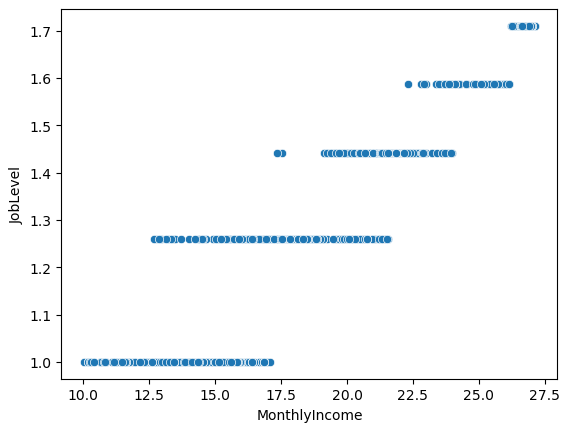

In [95]:
sns.scatterplot(df['MonthlyIncome'],df['JobLevel'])


<AxesSubplot:xlabel='JobLevel', ylabel='TotalWorkingYears'>

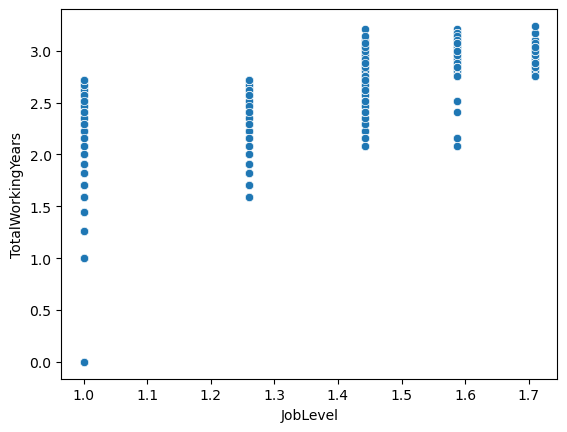

In [96]:
sns.scatterplot(df['JobLevel'],df['TotalWorkingYears'])


<AxesSubplot:xlabel='MonthlyIncome', ylabel='TotalWorkingYears'>

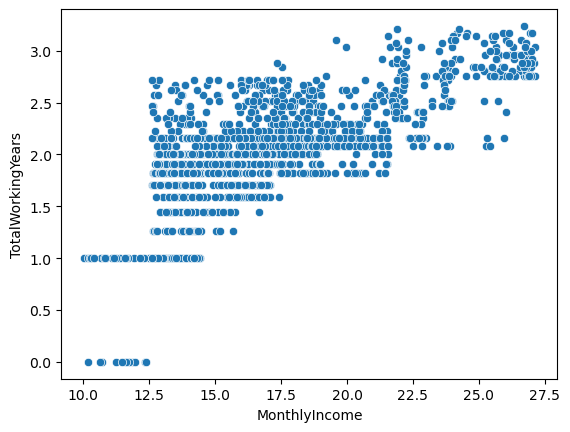

In [97]:
sns.scatterplot(df['MonthlyIncome'],df['TotalWorkingYears'])


<AxesSubplot:xlabel='JobRole', ylabel='Department'>

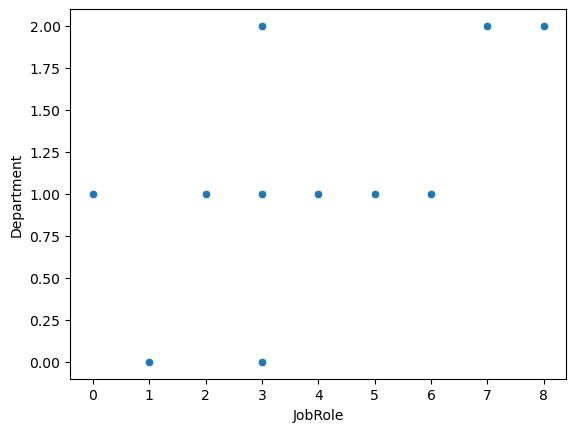

In [98]:
sns.scatterplot(df['JobRole'],df['Department'])


In [99]:
cor["Attrition"].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.257237
BusinessTravel              0.127943
DistanceFromHome            0.082048
JobRole                     0.064283
Department                  0.063637
NumCompaniesWorked          0.055629
Gender                      0.036252
EducationField              0.023585
MonthlyRate                 0.014888
PerformanceRating           0.010781
HourlyRate                 -0.001532
PercentSalaryHike          -0.009754
EmployeeNumber             -0.010169
MaritalStatus              -0.021732
Education                  -0.032703
YearsSinceLastPromotion    -0.052245
RelationshipSatisfaction   -0.052344
DailyRate                  -0.057220
TrainingTimesLastYear      -0.057285
WorkLifeBalance            -0.062492
EnvironmentSatisfaction    -0.112393
JobSatisfaction            -0.114206
JobInvolvement             -0.133957
Age                        -0.159366
StockOptionLevel           -0.185386
MonthlyIncome              -0.187076
J

### seperating features and label

In [100]:
x=df.drop("Attrition",axis=1)
y=df["Attrition"]

### feature scaling using Standard Scalarization

In [101]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.536681,-0.161996,0.734325,1.405373,-1.410317,-0.876177,-0.940815,0.0,-1.702014,-0.665328,-1.229911,1.388670,0.376231,0.212942,1.007448,1.143776,-0.303890,0.210370,0.734688,1.422300,0.0,1.584737,-1.262488,-0.424765,-1.575817,0.0,-1.122916,-0.114048,-2.171420,-2.501172,0.252482,0.392669,-1.092503,0.591785
1,1.442111,1.710411,-1.307769,-0.496337,0.161865,-1.853858,-0.940815,0.0,-1.700354,0.251978,0.813067,-0.239091,-1.034126,0.212942,0.604178,-0.673426,0.965675,-0.031932,1.505353,-0.307902,0.0,-0.631019,2.010104,2.354241,1.199034,0.0,0.678498,0.184647,0.151871,0.336558,0.878987,0.866219,0.294582,0.880566
2,0.083966,-0.161996,1.406752,-0.496337,-1.001674,-0.876177,1.305159,0.0,-1.697034,1.169285,0.813067,1.290017,-1.034126,-1.064919,-1.008901,0.235175,-0.303890,-1.210176,-1.690747,1.105881,0.0,1.584737,0.016336,-0.424765,-0.650866,0.0,-1.122916,-0.282450,0.151871,0.336558,-3.122519,-1.916528,-1.092503,-1.841300
3,-0.368749,1.710411,1.453896,-0.496337,-0.715020,1.079185,-0.940815,0.0,-1.695374,1.169285,-1.229911,-0.485721,0.376231,-1.064919,0.604178,0.235175,0.965675,-0.816728,1.257173,-0.307902,0.0,1.584737,-1.262488,-0.424765,0.274084,0.0,-1.122916,-0.114048,0.151871,0.336558,0.592150,0.866219,0.908019,-1.841300
4,-1.047821,-0.161996,-0.533609,-0.496337,-1.001674,-1.853858,0.556501,0.0,-1.692054,-1.582635,0.813067,-1.274939,0.376231,-1.064919,-1.008901,-0.673426,0.965675,-0.589237,0.330473,1.560861,0.0,-0.631019,-0.916964,-0.424765,1.199034,0.0,0.678498,-0.467759,0.151871,0.336558,-0.782424,-0.083717,0.655114,-0.048587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,-0.029213,1.710411,0.193406,-0.496337,1.488578,-0.876177,0.556501,0.0,1.717604,0.251978,0.813067,-1.225613,1.786588,0.212942,-1.008901,1.143776,0.965675,-0.968799,-0.286002,0.708420,0.0,-0.631019,0.571034,-0.424765,0.274084,0.0,0.678498,0.990880,0.151871,0.336558,0.053478,-0.083717,-1.092503,0.210844
1383,0.310324,-0.161996,-0.479021,-0.496337,-0.125655,-1.853858,0.556501,0.0,1.719264,1.169285,0.813067,-1.176286,-1.034126,1.109331,-1.815441,-1.582027,0.965675,1.101395,1.015523,0.708420,0.0,-0.631019,0.016336,-0.424765,-1.575817,0.0,0.678498,0.040844,1.700732,0.336558,0.430434,0.866219,0.294582,0.880566
1384,-1.047821,-0.161996,-1.615447,-0.496337,-0.486815,0.101504,-0.940815,0.0,1.722584,-0.665328,0.813067,1.043387,1.786588,0.212942,-0.202362,-0.673426,0.965675,0.249802,-1.296328,-0.307902,0.0,1.584737,1.326697,2.354241,-0.650866,0.0,0.678498,-0.467759,-2.171420,0.336558,0.252482,-0.083717,-1.092503,0.210844
1385,1.442111,1.710411,0.538304,1.405373,-1.001674,0.101504,0.556501,0.0,1.724244,1.169285,0.813067,-0.140439,-1.034126,0.212942,1.007448,-0.673426,0.965675,0.043755,-0.150696,0.141814,0.0,-0.631019,-0.279675,-0.424765,1.199034,0.0,-1.122916,0.990880,0.151871,-1.082307,0.740892,0.726843,-1.092503,1.004454


### checking variance inflation factor(VIF) to find the multicoliniratiy

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.848462,Age
1,1.018742,BusinessTravel
2,1.025849,DailyRate
3,2.083642,Department
4,1.020024,DistanceFromHome
5,1.060567,Education
6,1.021750,EducationField
7,NaN,EmployeeCount
8,1.021057,EmployeeNumber
9,1.024705,EnvironmentSatisfaction


### we can see that all the VIF value are less than 10 so there is no multicolinearity issue present in the data

In [103]:
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

### Here we can see that data is not balanced,since it is a classifiction problem we will balance the data using oversampling method.

## Oversampling

In [104]:
!pip install imblearn

In [105]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [106]:
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

In [107]:
y1.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

### we can solve the imbalance lable lets ahead for model building

### Modeling

#### Finding the best RandomState

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy",maxAccu,"at Random state",maxRS)        
        

Best Accuracy 0.9611510791366906 at Random state 160


In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

### classification Algorithim

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

### RandomForest Classifier



In [138]:
#checking accuracy for randomforestclassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8657074340527577
[[352   1]
 [ 55   9]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       353
           1       0.90      0.14      0.24        64

    accuracy                           0.87       417
   macro avg       0.88      0.57      0.58       417
weighted avg       0.87      0.87      0.82       417



### Logistic Regression

In [139]:
#cheking accuracy for logisticregression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8776978417266187
[[342  11]
 [ 40  24]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       353
           1       0.69      0.38      0.48        64

    accuracy                           0.88       417
   macro avg       0.79      0.67      0.71       417
weighted avg       0.86      0.88      0.86       417



### SVC

In [140]:
#cheking accuracy for SVC
svm=SVC()
svm.fit(x_train,y_train)
predsvm=svm.predict(x_test)
print(accuracy_score(y_test,predsvm))
print(confusion_matrix(y_test,predsvm))
print(classification_report(y_test,predsvm))

0.8705035971223022
[[349   4]
 [ 50  14]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       353
           1       0.78      0.22      0.34        64

    accuracy                           0.87       417
   macro avg       0.83      0.60      0.63       417
weighted avg       0.86      0.87      0.84       417



### GradientBoostingClassifier

In [141]:
#checking accuracy for GradiantBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8609112709832134
[[344   9]
 [ 49  15]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       353
           1       0.62      0.23      0.34        64

    accuracy                           0.86       417
   macro avg       0.75      0.60      0.63       417
weighted avg       0.84      0.86      0.83       417



### BaggingClassifier

In [142]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8513189448441247
[[344   9]
 [ 53  11]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       353
           1       0.55      0.17      0.26        64

    accuracy                           0.85       417
   macro avg       0.71      0.57      0.59       417
weighted avg       0.82      0.85      0.82       417



### Ada BoostClassifier

In [143]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8561151079136691
[[339  14]
 [ 46  18]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       353
           1       0.56      0.28      0.38        64

    accuracy                           0.86       417
   macro avg       0.72      0.62      0.65       417
weighted avg       0.83      0.86      0.84       417



In [144]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
predDT=DT.predict(x_test)
print(accuracy_score(y_test,predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))

0.7937649880095923
[[306  47]
 [ 39  25]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       353
           1       0.35      0.39      0.37        64

    accuracy                           0.79       417
   macro avg       0.62      0.63      0.62       417
weighted avg       0.80      0.79      0.80       417



In [145]:
y_test.shape

(417,)

In [146]:
predDT.shape

(417,)

In [147]:
#checking cv score for RandomForestClassifier
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,predRFC) - score.mean())

[0.76508621 0.97840173 0.96976242 0.97408207 0.74298056]
0.8860625977508005
Differcnce between accuracy score and cross validation score is - -0.0203551636980428


In [148]:
#checking cv score for LogisticRegression
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,predLR) - score.mean())

[0.70258621 0.79697624 0.76457883 0.76673866 0.75809935]
0.7577958590898934
Differcnce between accuracy score and cross validation score is - 0.11990198263672525


In [149]:
#checking cv score for Support Vector Machine classifier
score=cross_val_score(svm,x1,y1)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,predsvm) - score.mean())

[0.8512931  0.92656587 0.90928726 0.90712743 0.90064795]
0.8989843226334997
Differcnce between accuracy score and cross validation score is - -0.028480725511197513


In [150]:
#checking cv score for GradientBoostingClssifier
score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,predGB) - score.mean())

[0.59482759 0.86825054 0.79697624 0.84665227 0.52267819]
0.7258769643256127
Differcnce between accuracy score and cross validation score is - 0.13503430665760074


In [151]:
#checking cv score for BaggingClassifier
score=cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,predBC) - score.mean())

[0.5237069  0.9287257  0.92440605 0.91792657 0.5637149 ]
0.7716960229388545
Differcnce between accuracy score and cross validation score is - 0.0796229219052702


In [152]:
#checking cv score for AdaBoostingClassifier
score=cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,predABC) - score.mean())

[0.4762931  0.81857451 0.76025918 0.76673866 0.63066955]
0.6905070008192449
Differcnce between accuracy score and cross validation score is - 0.1656081070944242


In [153]:
#checking cv score for AdaBoostingClassifier
score=cross_val_score(DT,x1,y1)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,predDT) - score.mean())

[0.51508621 0.86177106 0.87688985 0.84449244 0.55291577]
0.7302310642734788
Differcnce between accuracy score and cross validation score is - 0.06353392373611344


### RandomforestClassifier is our best model as the difference between accuracy score and cross validation score is least
.
### randomforestClassifier is our Best model

### Hyper parameter Tuning
​

In [154]:
from sklearn.model_selection import GridSearchCV

In [159]:
params = {'n_estimators':[10,12,14,16,18,20,22,23,45],
         'criterion':['entropy','gini'],
         'max_depth':[15,5,10,15,20,25,],
         'min_samples_split':[10,11,13,14,15],
         'min_samples_leaf':[5,6,7,8]
         }
grd = GridSearchCV(RFC,param_grid=params)
grd.fit(x_train,y_train)


print('best_params = > ',grd.best_params_)

best_params = >  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 15, 'n_estimators': 10}


In [160]:
RFC = grd.best_estimator_

RFC.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=7,
                       min_samples_split=15, n_estimators=10)

In [161]:
#checking accuracy for randomforestclassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8633093525179856
[[351   2]
 [ 55   9]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       353
           1       0.82      0.14      0.24        64

    accuracy                           0.86       417
   macro avg       0.84      0.57      0.58       417
weighted avg       0.86      0.86      0.82       417



In [162]:
import pickle
filename='HR.pkl'
pickle.dump(RFC,open(filename,'wb'))

In [163]:
import pickle
loaded_model=pickle.load(open('HR.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

86.33093525179856


In [164]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416
predicted,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
original,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
